***
***
***
<br><h2>Apprentice Chef Case</h2>
    
Sally Moywaywa<br>
Machine learning | FMSBA 3 | Individual Assignment 1 <br>

***
***
***

In [21]:
#importing libraries
import pandas                  as pd 
import matplotlib.pyplot       as plt 
import seaborn                 as sns 
import statsmodels.formula.api as smf 
from sklearn.model_selection   import train_test_split 
from sklearn.linear_model      import LinearRegression 
from sklearn.ensemble          import GradientBoostingRegressor
import sklearn.linear_model

#specifing file name
file = "Apprentice_Chef_Dataset.xlsx"

#Reading file in python

Apprentice_Data = pd.read_excel(file)

In [22]:
#printing the first 5 rows of the dataset
Apprentice_Data.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,4,1,0,90,135.3,3,1,3,13,253


---
---
---
Classifying Variables into different data types 
---

Here we will try to understanding what the variables in the data set really mean before doing the analysis

---
---

In [23]:
#getting information on each variable in the dataset
Apprentice_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
PC_LOGINS                       1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
W

---
---

Note that there is missing data in the family name column that we will impute later

---

In [24]:
Apprentice_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
REVENUE,1946.0,2107.292652,1138.290709,131.00,1350.0,1740.00,2670.0000,8793.75
CROSS_SELL_SUCCESS,1946.0,0.678828,0.467047,0.00,0.0,1.00,1.0000,1.00
TOTAL_MEALS_ORDERED,1946.0,74.634121,55.309782,11.00,39.0,60.00,95.0000,493.00
UNIQUE_MEALS_PURCH,1946.0,4.904933,2.502175,1.00,3.0,5.00,7.0000,19.00
CONTACTS_W_CUSTOMER_SERVICE,1946.0,6.983556,2.281193,1.00,5.0,7.00,8.0000,18.00
PRODUCT_CATEGORIES_VIEWED,1946.0,5.383864,3.044001,1.00,3.0,5.00,8.0000,10.00
AVG_TIME_PER_SITE_VISIT,1946.0,99.604651,62.341756,10.33,72.0,94.16,117.2875,1645.60
MOBILE_NUMBER,1946.0,0.877698,0.327719,0.00,1.0,1.00,1.0000,1.00
CANCELLATIONS_BEFORE_NOON,1946.0,1.404933,1.549677,0.00,0.0,1.00,2.0000,13.00
CANCELLATIONS_AFTER_NOON,1946.0,0.165982,0.432241,0.00,0.0,0.00,0.0000,3.00


In [25]:

"""

Counts
Total Meals Ordered
Unique Meals Purchased

Objects
Name
Email
First Name
Family Name

Discreet
cross sell success (binary)
contact with customer service (number of times they called customer service)
Product categories viewed
mobile number (binary - whether given or not)
Cancellations before noon
Cancellations after noon
Tastes and preference (binary)
Pc logins (Number of times one went to the site on a pc)
Mobile logins (Number of times one went to the site using a mobile)
Weekly plan
Early deliveries
Late deliveries
Package locker (binary- present or not)
Refrigerator (binary- present or not)
largest order size
Master classes attended
Median meal rating
Average clicks per visit
Total Photos viewed


Continuous
Revenue
Avg_Time_Per Site_Visit (Average time spent on the site)
Followed recommendations (percentage)
Average preparation video time
"""


'\n\nCounts\nTotal Meals Ordered\nUnique Meals Purchased\n\nObjects\nName\nEmail\nFirst Name\nFamily Name\n\nDiscreet\ncross sell success (binary)\ncontact with customer service (number of times they called customer service)\nProduct categories viewed\nmobile number (binary - whether given or not)\nCancellations before noon\nCancellations after noon\nTastes and preference (binary)\nPc logins (Number of times one went to the site on a pc)\nMobile logins (Number of times one went to the site using a mobile)\nWeekly plan\nEarly deliveries\nLate deliveries\nPackage locker (binary- present or not)\nRefrigerator (binary- present or not)\nlargest order size\nMaster classes attended\nMedian meal rating\nAverage clicks per visit\nTotal Photos viewed\n\n\nContinuous\nRevenue\nAvg_Time_Per Site_Visit (Average time spent on the site)\nFollowed recommendations (percentage)\nAverage preparation video time\n'

----
----
----
Grouping the data using email addresses 
----

According to the case the marketing team groups the customers based on their email addresses and responds to each customer differently based on this segmentation

----
----

In [26]:
#splitting emails

# creating an empty list
list1 = []

# looping over each email address in the data set
for index, col in Apprentice_Data.iterrows():
    
    # splitting email domain at '@'
    email_split = Apprentice_Data.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending list1 with the email_split
    list1.append(email_split)
    

# converting list1 into a DataFrame 
emails_df = pd.DataFrame(list1)


# printing out the results
emails_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


In [27]:
# concatenating with apprentice chef DataFrame

# this is just a safety measure in case of multiple concatenations
Apprentice_Data = pd.read_excel("Apprentice_Chef_Dataset.xlsx")


# renaming the columns
emails_df.columns = ['NAME' ,'EMAIL_DOMAINS']

# concatenating personal_email_domain 
Apprentice_Data = pd.concat([Apprentice_Data, emails_df['EMAIL_DOMAINS']],
               axis = 1)


# printing the value counts of personal_email_domain per domain name
Apprentice_Data.loc[: ,'EMAIL_DOMAINS'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
mcdonalds.com        28
cocacola.com         28
merck.com            28
nike.com             27
apple.com            27
dupont.com           26
ge.org               26
ibm.com              26
microsoft.com        25
chevron.com          25
travelers.com        24
unitedhealth.com     24
exxon.com            24
boeing.com           23
verizon.com          22
caterpillar.com      22
mmm.com              22
pg.com               22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
unitedtech.com       18
goldmansacs.com      18
cisco.com            18
homedepot.com        17
intel.com            17
Name: EMAIL_DOMAINS, dtype: int64

In [28]:
#Grouping emails as professional, personal or junk
professional_emails = ['@mmm.com', '@amex.com','@apple.com', '@boeing.com',
                       '@caterpillar.com', '@chevron.com', '@cisco.com',
                       '@cocacola.com', '@disney.com', '@dupont.com', 
                       '@exxon.com', '@ge.org', '@goldmansacs.com', 
                       '@homedepot.com', '@ibm.com', '@intel.com', 
                       '@jnj.com', '@jpmorgan.com', '@mcdonalds.com',
                       '@merck.com', '@microsoft.com', '@nike.com', 
                       '@pfizer.com','@pg.com', '@travelers.com', 
                       '@unitedtech.com', '@unitedhealth.com',
                       '@verizon.com', '@visa.com', '@walmart.com']

personal_emails    = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_emails        = ['@me.com', '@aol.com', '@hotmail.com',
                      '@live.com', '@msn.com', '@passport.com']

# creating an empty list
list2 = []

# looping to group the emails by domain
for domain in Apprentice_Data['EMAIL_DOMAINS']:
        if '@' + domain in professional_emails: 
            list2.append('professional')
            
        elif '@' + domain in personal_emails:
            list2.append('personal')
            
        elif '@' + domain in junk_emails:
            list2.append('junk')
            
        else:
            print('Unknown')
            

# concatenating with original DataFrame
Apprentice_Data['EMAIL_DOMAINS'] = pd.Series(list2)

# checking results to see if code worked
Apprentice_Data['EMAIL_DOMAINS'].value_counts()

personal        861
professional    696
junk            389
Name: EMAIL_DOMAINS, dtype: int64

----
----
----
Understanding what revenue means for the company
----

Revenue is a total of meals and beverage sold by the company multiply by the price.
Since information on the amount spent by a customer to purchase Beverages is not given, then we must impute this information.

The case mentions that on a meal price ranges from \\$10 to \\$23. Therefore we can assume that any amount spent above the average is spent on drinks.

---
---

In [29]:
#adding a beverage column
Apprentice_Data['SALE'] = Apprentice_Data['REVENUE']/Apprentice_Data['TOTAL_MEALS_ORDERED']

#Calculating the average meal sale price
average_meal_price= (23+10)/2

#creating a beverage sale column
Apprentice_Data['BEVERAGE'] = Apprentice_Data['SALE'] - average_meal_price

BEVERAGE = []

#Creating a loop that automatically fills in the value of the bevearage sale to the empty list
for i in Apprentice_Data['BEVERAGE']:
    if i > 0:
        sale = i
        BEVERAGE.append(sale)
    
    else:
        sale = 0
        BEVERAGE.append(sale)

Apprentice_Data['BEVARAGE'] = BEVERAGE
        

In [30]:
#checking information on the beverage column
Apprentice_Data['BEVERAGE'].describe() #will be classified as continuous data

count    1946.000000
mean       19.999092
std        19.363105
min        -6.717391
25%         5.659699
50%        17.056548
75%        28.500000
max       136.625000
Name: BEVERAGE, dtype: float64

---
---
---

**Missing data and imputation**
---

We earlier noted the presence of missing data in the family name column and here we will impute the missing values and add a null character for the missing cells. 

---
---

In [31]:
#checking for missing data values in the dataset
Apprentice_Data.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [32]:
#creating a loop that will loop over column with missing data
for col in Apprentice_Data :

    # creating column with 1s if missing and 0 if not
    if Apprentice_Data[col].isnull().astype(int).sum() > 0 :
        Apprentice_Data['m_'+col] = Apprentice_Data[col].isnull().astype(object)

#displaying the first 5 rows of the dataset
Apprentice_Data.head (n=5) 

#checking if there are any 1's ( meaning there is missing data)
Apprentice_Data['m_FAMILY_NAME'].sum()

47

In [33]:
#Filling in missing values
# creating an imputation value that will be filled in place of missing data
fill = "N/A"


# imputing 'FAMILY_NAME'
Apprentice_Data['FAMILY_NAME'] = Apprentice_Data['FAMILY_NAME'].fillna(fill)

#displaying the first 5 rows of the dataset
#Apprentice_Data.head (n=5) 

#checking if code worked
Apprentice_Data.isnull().any().any()

False

----
----
----
Outlier Analysis
----

We will now plot histograms to check the distribution of each variable. This will make it easier to spot outliers and flag them. We will then set thresholds to cut off the data skewing out dataset and save them in new columns

----
----

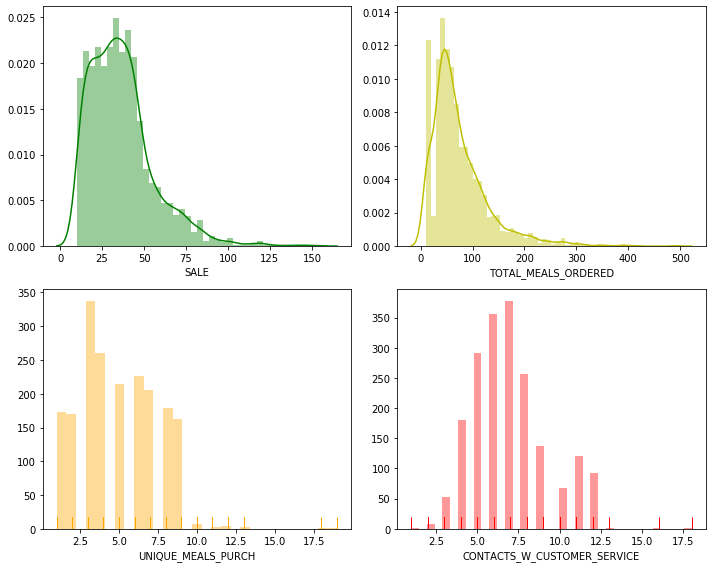

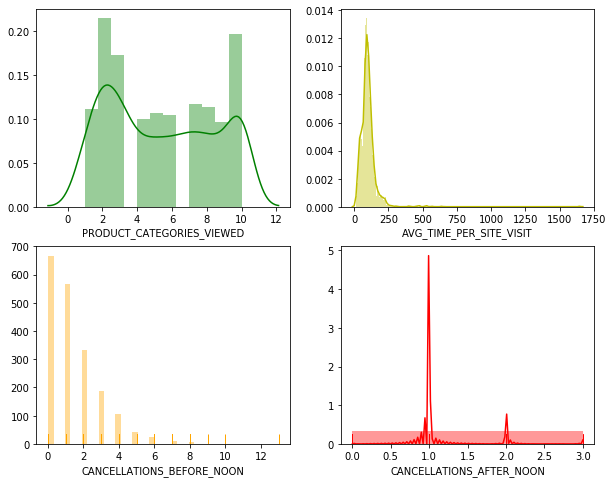

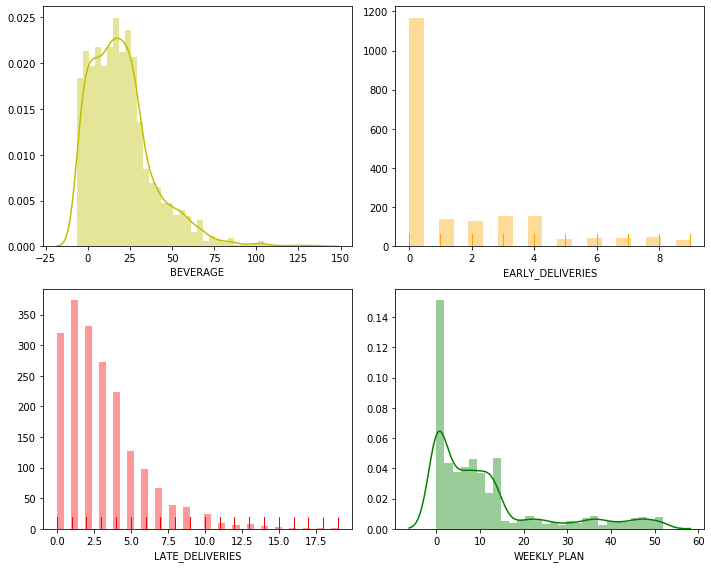

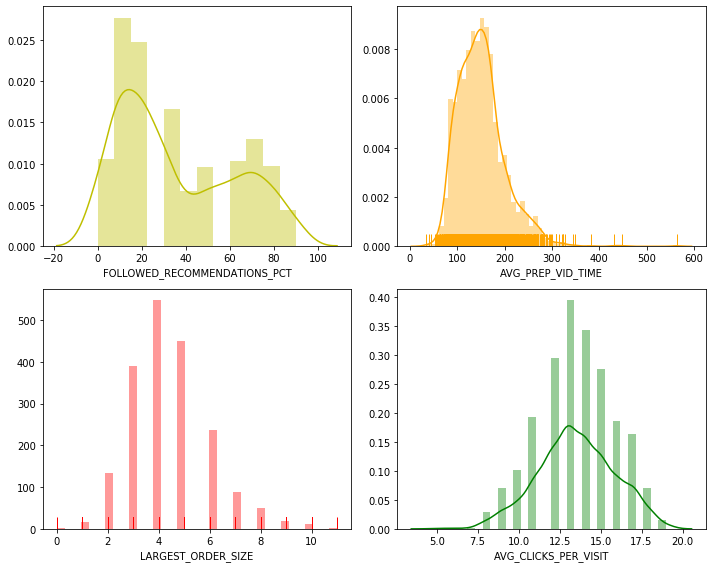

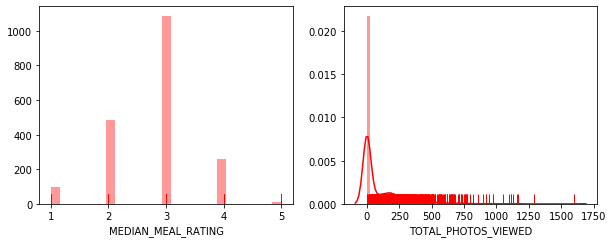

In [34]:
# plotting Histograms to spot outliers
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Apprentice_Data['SALE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('SALE')

########################

plt.subplot(2, 2, 2)
sns.distplot(Apprentice_Data['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(Apprentice_Data['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.distplot(Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(Apprentice_Data['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(Apprentice_Data['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 4)
sns.distplot(Apprentice_Data['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_AFTER_NOON')
plt.show()


########################


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Apprentice_Data['BEVERAGE'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('BEVERAGE')

########################

plt.subplot(2, 2, 2)
sns.distplot(Apprentice_Data['EARLY_DELIVERIES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(Apprentice_Data['LATE_DELIVERIES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(Apprentice_Data['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('WEEKLY_PLAN')
plt.tight_layout()
plt.show()

########################


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 2)
sns.distplot(Apprentice_Data['AVG_PREP_VID_TIME'],
             bins = 'fd',
             rug  = True,
             color = 'orange')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 3)
sns.distplot(Apprentice_Data['LARGEST_ORDER_SIZE'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 4)
sns.distplot(Apprentice_Data['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_CLICKS_PER_VISIT')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(Apprentice_Data['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 2)
sns.distplot(Apprentice_Data['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             rug   = True,
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.show()

In [35]:
# setting outlier thresholds
SALE_hi                         = 75
TOTAL_MEALS_ORDERED_hi          = 300
UNIQUE_MEALS_PURCH_hi           = 8
CONTACTS_W_CUSTOMER_SERVICE_hi  = 10
AVG_TIME_PER_SITE_VISIT_hi      = 250
CANCELLATIONS_BEFORE_NOON_hi    = 6
BEVERAGE_hi                     = 70
BEVERAGE_lo                     = 0
EARLY_DELIVERIES_hi             = 5
EARLY_DELIVERIES_lo             = 1
LATE_DELIVERIES_hi              = 12.5
AVG_PREP_VID_TIME_hi            = 300
AVG_CLICKS_PER_VISIT_lo         = 7.5
TOTAL_PHOTOS_VIEWED_hi          = 750


##############################################################################
## outlier thresholds                             
##############################################################################

# developing new columns for outlier values in the dataset

# SALE
Apprentice_Data['out_SALE'] = 0
condition_hi = Apprentice_Data.loc[0:,'out_SALE'][Apprentice_Data['SALE'] > SALE_hi]

Apprentice_Data['out_SALE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# TOTAL_MEALS_ORDERED
Apprentice_Data['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = Apprentice_Data.loc[0:,'out_TOTAL_MEALS_ORDERED'][Apprentice_Data['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

Apprentice_Data['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# UNIQUE_MEALS_PURCH
Apprentice_Data['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = Apprentice_Data.loc[0:,'out_UNIQUE_MEALS_PURCH'][Apprentice_Data['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_hi]

Apprentice_Data['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = Apprentice_Data.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = Apprentice_Data.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][Apprentice_Data['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_BEFORE_NOON
Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = Apprentice_Data.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# BEVERAGE
Apprentice_Data['out_BEVERAGE'] = 0
condition_hi = Apprentice_Data.loc[0:,'out_BEVERAGE'][Apprentice_Data['BEVERAGE'] > BEVERAGE_hi]
condition_lo = Apprentice_Data.loc[0:,'out_BEVERAGE'][Apprentice_Data['BEVERAGE'] < BEVERAGE_lo]

Apprentice_Data['out_BEVERAGE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

Apprentice_Data['out_BEVERAGE'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)


# EARLY_DELIVERIES
Apprentice_Data['out_EARLY_DELIVERIES'] = 0
condition_hi = Apprentice_Data.loc[0:,'out_EARLY_DELIVERIES'][Apprentice_Data['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]
condition_lo = Apprentice_Data.loc[0:,'out_EARLY_DELIVERIES'][Apprentice_Data['EARLY_DELIVERIES'] < EARLY_DELIVERIES_lo]

Apprentice_Data['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

Apprentice_Data['out_EARLY_DELIVERIES'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)


# LATE_DELIVERIES
Apprentice_Data['out_LATE_DELIVERIES'] = 0
condition_hi = Apprentice_Data.loc[0:,'out_LATE_DELIVERIES'][Apprentice_Data['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

Apprentice_Data['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# AVG_PREP_VID_TIME
Apprentice_Data['out_AVG_PREP_VID_TIME'] = 0
condition_hi = Apprentice_Data.loc[0:,'out_AVG_PREP_VID_TIME'][Apprentice_Data['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

Apprentice_Data['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_CLICKS_PER_VISIT
Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] = 0
condition_lo = Apprentice_Data.loc[0:,'out_AVG_CLICKS_PER_VISIT'][Apprentice_Data['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_lo]

Apprentice_Data['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# TOTAL_PHOTOS_VIEWED
Apprentice_Data['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = Apprentice_Data.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][Apprentice_Data['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

Apprentice_Data['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


----
----
----
Trend based analysis
----
We will now investigate where the trend changes for each variable by plotting scatter plots

----
----

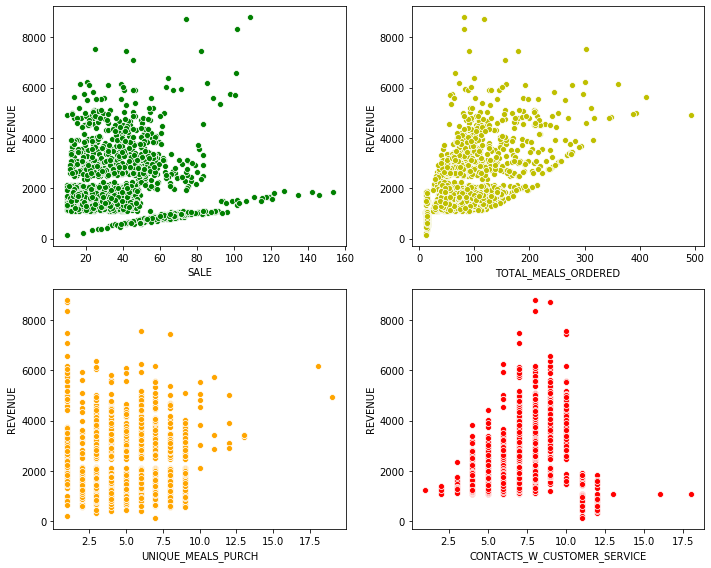

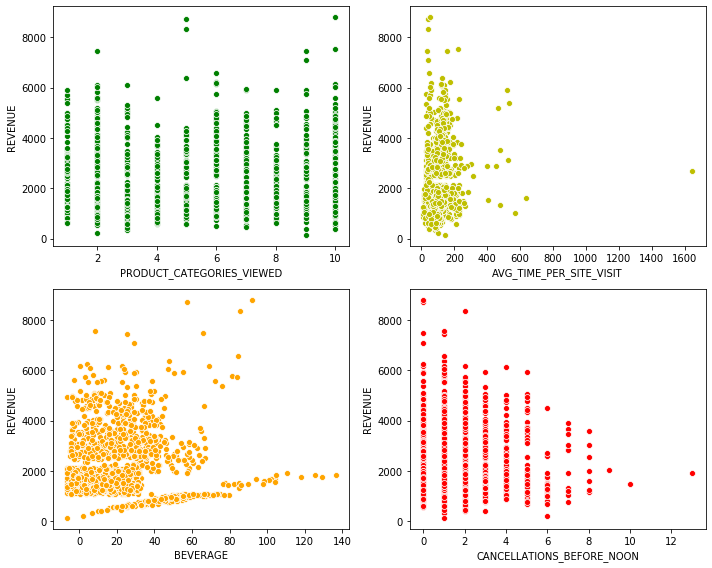

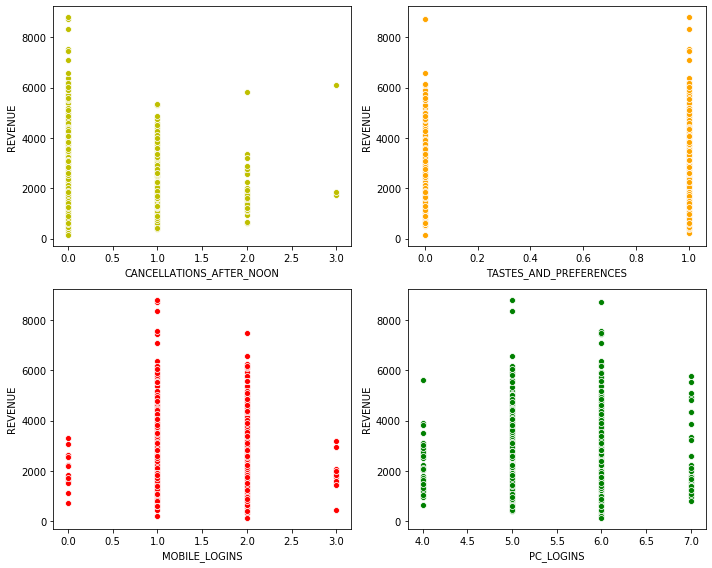

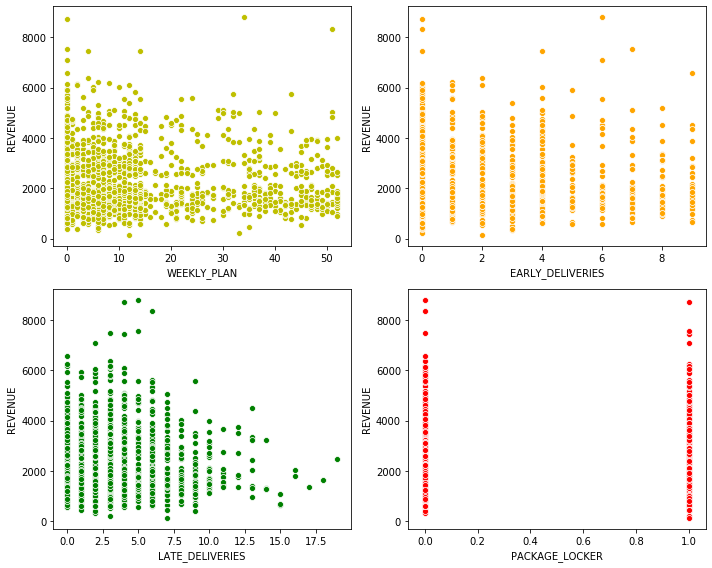

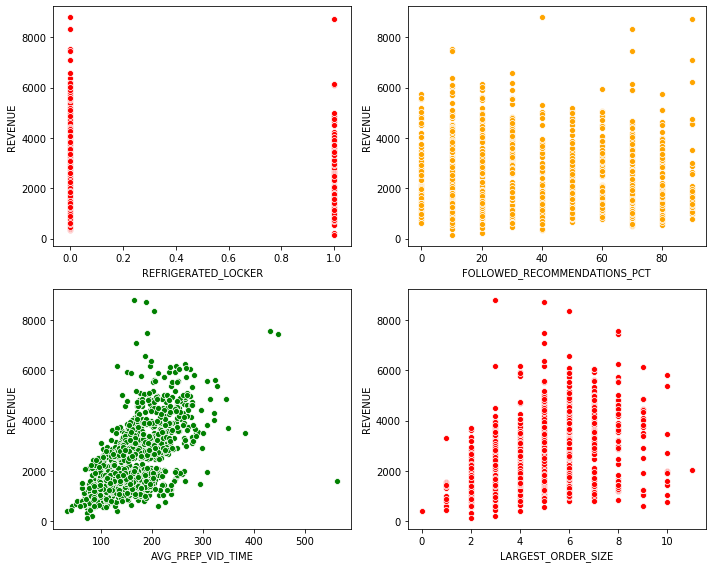

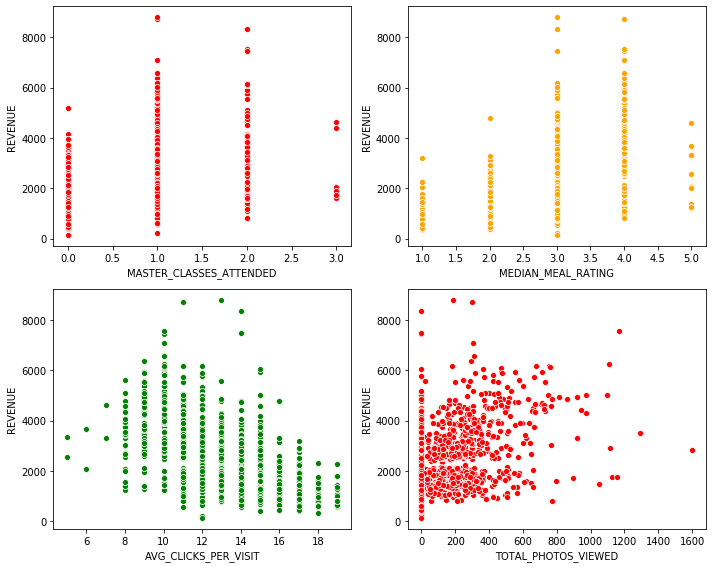

In [82]:
########################
# Plotting scatterplots
########################


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Apprentice_Data['SALE'],
                y = Apprentice_Data['REVENUE'],
                color = 'g')
plt.xlabel('SALE')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = Apprentice_Data['TOTAL_MEALS_ORDERED'],
                y = Apprentice_Data['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = Apprentice_Data['UNIQUE_MEALS_PURCH'],
                y = Apprentice_Data['REVENUE'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'],
                y = Apprentice_Data['REVENUE'],
                color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'],
                y = Apprentice_Data['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = Apprentice_Data['AVG_TIME_PER_SITE_VISIT'],
                y = Apprentice_Data['REVENUE'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = Apprentice_Data['BEVERAGE'],
                y = Apprentice_Data['REVENUE'],
                color = 'orange')
plt.xlabel('BEVERAGE')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = Apprentice_Data['CANCELLATIONS_BEFORE_NOON'],
                y = Apprentice_Data['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Apprentice_Data['CANCELLATIONS_AFTER_NOON'],
                y = Apprentice_Data['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = Apprentice_Data['TASTES_AND_PREFERENCES'],
                y = Apprentice_Data['REVENUE'],
                color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = Apprentice_Data['MOBILE_LOGINS'],
                y = Apprentice_Data['REVENUE'],
                color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = Apprentice_Data['PC_LOGINS'],
                y = Apprentice_Data['REVENUE'],
                color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Apprentice_Data['WEEKLY_PLAN'],
                y = Apprentice_Data['REVENUE'],
                color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = Apprentice_Data['EARLY_DELIVERIES'],
                y = Apprentice_Data['REVENUE'],
                color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = Apprentice_Data['LATE_DELIVERIES'],
                y = Apprentice_Data['REVENUE'],
                color = 'g')
plt.xlabel('LATE_DELIVERIES')
plt.savefig('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = Apprentice_Data['PACKAGE_LOCKER'],
                y = Apprentice_Data['REVENUE'],
                color = 'r')
plt.xlabel('PACKAGE_LOCKER')

plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Apprentice_Data['REFRIGERATED_LOCKER'],
                y = Apprentice_Data['REVENUE'],
                color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = Apprentice_Data['REVENUE'],
                color = 'orange')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = Apprentice_Data['AVG_PREP_VID_TIME'],
                y = Apprentice_Data['REVENUE'],
                color = 'g')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = Apprentice_Data['LARGEST_ORDER_SIZE'],
                y = Apprentice_Data['REVENUE'],
                color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.show()

########################
                         
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = Apprentice_Data['MASTER_CLASSES_ATTENDED'],
                y = Apprentice_Data['REVENUE'],
                color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = Apprentice_Data['MEDIAN_MEAL_RATING'],
                y = Apprentice_Data['REVENUE'],
                color = 'orange')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = Apprentice_Data['AVG_CLICKS_PER_VISIT'],
                y = Apprentice_Data['REVENUE'],
                color = 'g')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = Apprentice_Data['TOTAL_PHOTOS_VIEWED'],
                y = Apprentice_Data['REVENUE'],
                color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()


In [37]:
# setting trend-based thresholds

SALE_change                         = 60
TOTAL_MEALS_ORDERED_change          = 250
UNIQUE_MEALS_PURCH_change           = 10
CONTACTS_W_CUSTOMER_SERVICE_change  = 10
AVG_TIME_PER_SITE_VISIT_change      = 210
BEVERAGE_change                     = 40
CANCELLATIONS_BEFORE_NOON_change    = 8
LATE_DELIVERIES_change              = 9
AVG_PREP_VID_TIME_change            = 280
TOTAL_PHOTOS_VIEWED_change          = 600

#developing new columns for changing trend values in the dataset

# SALE
Apprentice_Data['change_SALE'] = 0
condition_change = Apprentice_Data.loc[0:,'change_SALE'][Apprentice_Data['SALE'] > SALE_change]

Apprentice_Data['change_SALE'].replace(to_replace = condition_change,
                                value      = 1,
                                inplace    = True)


# TOTAL_MEALS_ORDERED
Apprentice_Data['change_TOTAL_MEALS_ORDERED'] = 0
condition_change = Apprentice_Data.loc[0:,'change_TOTAL_MEALS_ORDERED'][Apprentice_Data['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_change]

Apprentice_Data['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_change,
                                    value      = 1,
                                    inplace    = True)

# UNIQUE_MEALS_PURCH
Apprentice_Data['change_UNIQUE_MEALS_PURCH'] = 0
condition_change = Apprentice_Data.loc[0:,'change_UNIQUE_MEALS_PURCH'][Apprentice_Data['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_change]

Apprentice_Data['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_change,
                                    value      = 1,
                                    inplace    = True)

#CONTACTS_W_CUSTOMER_SERVICE
Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_change = Apprentice_Data.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_change]

Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_change,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
Apprentice_Data['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition_change = Apprentice_Data.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][Apprentice_Data['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_change]

Apprentice_Data['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_change,
                                    value      = 1,
                                    inplace    = True)

# BEVERAGE
Apprentice_Data['change_BEVERAGE'] = 0
condition_change = Apprentice_Data.loc[0:,'change_BEVERAGE'][Apprentice_Data['BEVERAGE'] > BEVERAGE_change]

Apprentice_Data['change_BEVERAGE'].replace(to_replace = condition_change,
                                 value      = 1,
                                 inplace    = True)


# CANCELLATIONS_BEFORE_NOON
Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition_change = Apprentice_Data.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_change]

Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_change,
                                    value      = 1,
                                    inplace    = True)


# LATE_DELIVERIES
Apprentice_Data['change_LATE_DELIVERIES'] = 0
condition_change = Apprentice_Data.loc[0:,'change_LATE_DELIVERIES'][Apprentice_Data['LATE_DELIVERIES'] > LATE_DELIVERIES_change]

Apprentice_Data['change_LATE_DELIVERIES'].replace(to_replace = condition_change,
                                    value      = 1,
                                    inplace    = True)

# AVG_PREP_VID_TIME
Apprentice_Data['change_AVG_PREP_VID_TIME'] = 0
condition_change = Apprentice_Data.loc[0:,'change_AVG_PREP_VID_TIME'][Apprentice_Data['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_change]

Apprentice_Data['change_AVG_PREP_VID_TIME'].replace(to_replace = condition_change,
                                    value      = 1,
                                    inplace    = True)


# TOTAL_PHOTOS_VIEWED
Apprentice_Data['change_TOTAL_PHOTOS_VIEWED'] = 0
condition_change = Apprentice_Data.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][Apprentice_Data['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_change]

Apprentice_Data['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_change,
                                    value      = 1,
                                    inplace    = True)

----
----
----
Building a model
----

We will first check if our variables are correlated to revenue then we will build a base model.

----
----

In [38]:
# Printing correlations with REVENUE
corr_df = Apprentice_Data.corr().round(2)
print(corr_df.loc['REVENUE'].sort_values(ascending = False))

REVENUE                               1.00
AVG_PREP_VID_TIME                     0.64
MEDIAN_MEAL_RATING                    0.61
TOTAL_MEALS_ORDERED                   0.60
TOTAL_PHOTOS_VIEWED                   0.47
MASTER_CLASSES_ATTENDED               0.45
LARGEST_ORDER_SIZE                    0.44
change_TOTAL_PHOTOS_VIEWED            0.27
change_TOTAL_MEALS_ORDERED            0.27
out_TOTAL_MEALS_ORDERED               0.23
change_AVG_PREP_VID_TIME              0.20
out_AVG_PREP_VID_TIME                 0.19
out_TOTAL_PHOTOS_VIEWED               0.18
AVG_TIME_PER_SITE_VISIT               0.14
CONTACTS_W_CUSTOMER_SERVICE           0.10
out_AVG_TIME_PER_SITE_VISIT           0.05
change_AVG_TIME_PER_SITE_VISIT        0.05
out_UNIQUE_MEALS_PURCH                0.04
PRODUCT_CATEGORIES_VIEWED             0.03
MOBILE_NUMBER                         0.03
BEVARAGE                              0.02
BEVERAGE                              0.02
SALE                                  0.02
PC_LOGINS  

In [39]:
# making a copy of the apprentice chef data set for use to build a base model
Apprentice_Data_explanatory = Apprentice_Data.copy()


# dropping Revenue and other categorical variables from the explanatory variable set
Apprentice_Data_explanatory = Apprentice_Data_explanatory.drop(["REVENUE","NAME","FIRST_NAME",
                                                               "EMAIL","FAMILY_NAME"], axis = 1)


# formatting each explanatory variable for use in statsmodels
for val in Apprentice_Data_explanatory:
    print(f"Apprentice_Data['{val}'] +")

Apprentice_Data['CROSS_SELL_SUCCESS'] +
Apprentice_Data['TOTAL_MEALS_ORDERED'] +
Apprentice_Data['UNIQUE_MEALS_PURCH'] +
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
Apprentice_Data['AVG_TIME_PER_SITE_VISIT'] +
Apprentice_Data['MOBILE_NUMBER'] +
Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
Apprentice_Data['CANCELLATIONS_AFTER_NOON'] +
Apprentice_Data['TASTES_AND_PREFERENCES'] +
Apprentice_Data['PC_LOGINS'] +
Apprentice_Data['MOBILE_LOGINS'] +
Apprentice_Data['WEEKLY_PLAN'] +
Apprentice_Data['EARLY_DELIVERIES'] +
Apprentice_Data['LATE_DELIVERIES'] +
Apprentice_Data['PACKAGE_LOCKER'] +
Apprentice_Data['REFRIGERATED_LOCKER'] +
Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT'] +
Apprentice_Data['AVG_PREP_VID_TIME'] +
Apprentice_Data['LARGEST_ORDER_SIZE'] +
Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
Apprentice_Data['MEDIAN_MEAL_RATING'] +
Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
Apprentice_Data['E

In [40]:
# building a base model

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['CROSS_SELL_SUCCESS'] +
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['CANCELLATIONS_AFTER_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['PC_LOGINS'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['out_TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['change_BEVERAGE'] +
                                Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['change_LATE_DELIVERIES'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)


# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     248.6
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:07   Log-Likelihood:                -14505.
No. Observations:                        1946   AIC:                         2.911e+04
Df Residuals:                            1896   BIC:                         2.939e+04
Df Model:                                  49                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.8590      2.289     -6.054      0.000     -18.348      -9.369
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -31.5322     26.833     -1.175      0.240     -84.158      21.093
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          2.8322     28.349      0.100      0.920     -52.767      58.431
Apprentice_Data['m_FAMILY_NAME'][T.True]                  7.5568     63.207      0.120      0.905    -116.405     131.519
Apprentice_Data['CROSS_SELL_SUCCESS']                    -5.1117     24.950     -0.205      0.838     -54.044      43.821
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8804      0.416     47.744      0.000      19.064      20.697
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -25.6558      6.044     -4.245      0.000     -37.509     -13.802
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.3341      7.142      7.188      0.000      37.328      65.341
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3923      3.207      0.746      0.456      -3.897       8.681
Apprentice_Data['AVG_TIME_PER_SITE_VISIT']               -0.0131      0.219     -0.060      0.952      -0.443       0.416
Apprentice_Data['MOBILE_NUMBER']                        -17.0824     29.891     -0.571      0.568     -75.706      41.541
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.7408      7.062     -1.096      0.273     -21.590       6.108
Apprentice_Data['CANCELLATIONS_AFTER_NOON']               0.1365     22.573      0.006      0.995     -44.134      44.407
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.2999     21.534     -0.711      0.477     -57.532      26.932
Apprentice_Data['PC_LOGINS']                              2.8776     16.733      0.172      0.863     -29.939      35.694
Apprentice_Data['MOBILE_LOGINS']                         -9.2318     18.501     -0.499      0.618     -45.517      27.053
Apprentice_Data['WEEKLY_PLAN']                            0.4855      0.717      0.677      0.498      -0.920       1.891
Apprentice_Data['EARLY_DELIVERIES']                       4.0143      4.475      0.897      0.370      -4.761      12.790
Apprentice_Data['LATE_DELIVERIES']                       10.3668      4.379      2.367      0.018       1.778      18.955
Apprentice_Data['PACKAGE_LOCKER']                        27.1476     23.119      1.174      0.240     -18.193      72.488
Apprentice_Data['REFRIGERATED_LOCKER']                  -33.8321     34.895     -0.970      0.332    -102.269      34.605
Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT']           0.2495   

----
---
We will now remove variables one by one that are not statistically significant, meaning their p values are greater than 0.05 from the base model

---
---

In [41]:
# building a full model removing CROSS_SELL_SUCCESS

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['CANCELLATIONS_AFTER_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['PC_LOGINS'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['out_TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['change_BEVERAGE'] +
                                Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['change_LATE_DELIVERIES'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)


# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     253.9
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:07   Log-Likelihood:                -14505.
No. Observations:                        1946   AIC:                         2.911e+04
Df Residuals:                            1897   BIC:                         2.938e+04
Df Model:                                  48                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.8567      2.289     -6.055      0.000     -18.345      -9.368
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -32.6904     26.224     -1.247      0.213     -84.122      18.741
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          1.2218     27.231      0.045      0.964     -52.184      54.627
Apprentice_Data['m_FAMILY_NAME'][T.True]                  6.9072     63.111      0.109      0.913    -116.867     130.682
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8853      0.416     47.850      0.000      19.070      20.700
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -25.6463      6.042     -4.244      0.000     -37.497     -13.796
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.2672      7.133      7.188      0.000      37.279      65.256
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3921      3.206      0.746      0.456      -3.895       8.679
Apprentice_Data['AVG_TIME_PER_SITE_VISIT']               -0.0155      0.219     -0.071      0.943      -0.444       0.413
Apprentice_Data['MOBILE_NUMBER']                        -17.7322     29.715     -0.597      0.551     -76.010      40.545
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.9341      6.996     -1.134      0.257     -21.656       5.787
Apprentice_Data['CANCELLATIONS_AFTER_NOON']               0.3455     22.544      0.015      0.988     -43.868      44.559
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.6526     21.459     -0.729      0.466     -57.739      26.434
Apprentice_Data['PC_LOGINS']                              2.7018     16.706      0.162      0.872     -30.063      35.467
Apprentice_Data['MOBILE_LOGINS']                         -9.0134     18.466     -0.488      0.626     -45.229      27.202
Apprentice_Data['WEEKLY_PLAN']                            0.4817      0.716      0.672      0.501      -0.923       1.886
Apprentice_Data['EARLY_DELIVERIES']                       3.9863      4.471      0.892      0.373      -4.783      12.756
Apprentice_Data['LATE_DELIVERIES']                       10.3621      4.378      2.367      0.018       1.776      18.949
Apprentice_Data['PACKAGE_LOCKER']                        27.1590     23.113      1.175      0.240     -18.170      72.488
Apprentice_Data['REFRIGERATED_LOCKER']                  -34.1621     34.849     -0.980      0.327    -102.509      34.185
Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT']           0.2119      0.372      0.569      0.569      -0.518       0.942
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4596   

In [42]:
# building a full model removing AVG_TIME_PER_SITE_VISIT

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['CANCELLATIONS_AFTER_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['PC_LOGINS'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['out_TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['change_BEVERAGE'] +
                                Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['change_LATE_DELIVERIES'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)


# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     259.4
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:07   Log-Likelihood:                -14505.
No. Observations:                        1946   AIC:                         2.911e+04
Df Residuals:                            1898   BIC:                         2.937e+04
Df Model:                                  47                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.8569      2.288     -6.057      0.000     -18.344      -9.370
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -32.6998     26.217     -1.247      0.212     -84.117      18.717
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          1.2169     27.224      0.045      0.964     -52.174      54.608
Apprentice_Data['m_FAMILY_NAME'][T.True]                  6.9493     63.092      0.110      0.912    -116.787     130.686
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8845      0.415     47.877      0.000      19.070      20.699
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -25.6950      6.002     -4.281      0.000     -37.466     -13.924
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.2912      7.123      7.201      0.000      37.322      65.260
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.4034      3.201      0.751      0.453      -3.874       8.681
Apprentice_Data['MOBILE_NUMBER']                        -17.7127     29.706     -0.596      0.551     -75.972      40.547
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.9365      6.995     -1.135      0.257     -21.654       5.781
Apprentice_Data['CANCELLATIONS_AFTER_NOON']               0.3314     22.537      0.015      0.988     -43.869      44.532
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.6444     21.453     -0.729      0.466     -57.719      26.430
Apprentice_Data['PC_LOGINS']                              2.7219     16.700      0.163      0.871     -30.030      35.473
Apprentice_Data['MOBILE_LOGINS']                         -9.0391     18.457     -0.490      0.624     -45.238      27.160
Apprentice_Data['WEEKLY_PLAN']                            0.4805      0.716      0.671      0.502      -0.924       1.884
Apprentice_Data['EARLY_DELIVERIES']                       3.9881      4.470      0.892      0.372      -4.779      12.755
Apprentice_Data['LATE_DELIVERIES']                       10.3592      4.377      2.367      0.018       1.775      18.943
Apprentice_Data['PACKAGE_LOCKER']                        27.1398     23.105      1.175      0.240     -18.174      72.454
Apprentice_Data['REFRIGERATED_LOCKER']                  -34.0990     34.829     -0.979      0.328    -102.406      34.208
Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT']           0.2132      0.372      0.574      0.566      -0.516       0.942
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4583      0.437      7.915      0.000       2.601       4.315
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.4371   

In [43]:
# building a full model removing CANCELLATIONS_AFTER_NOON

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['PC_LOGINS'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['out_TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['change_BEVERAGE'] +
                                Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['change_LATE_DELIVERIES'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)

# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     265.2
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:07   Log-Likelihood:                -14505.
No. Observations:                        1946   AIC:                         2.910e+04
Df Residuals:                            1899   BIC:                         2.937e+04
Df Model:                                  46                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.8558      2.286     -6.061      0.000     -18.339      -9.372
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -32.7143     26.191     -1.249      0.212     -84.081      18.653
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          1.2110     27.214      0.045      0.965     -52.161      54.583
Apprentice_Data['m_FAMILY_NAME'][T.True]                  6.9520     63.075      0.110      0.912    -116.751     130.655
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8844      0.415     47.901      0.000      19.070      20.699
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -25.6980      5.997     -4.285      0.000     -37.459     -13.937
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.2911      7.121      7.203      0.000      37.326      65.256
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.4013      3.197      0.751      0.453      -3.868       8.671
Apprentice_Data['MOBILE_NUMBER']                        -17.6993     29.684     -0.596      0.551     -75.916      40.518
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.9342      6.991     -1.135      0.257     -21.645       5.777
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.6584     21.427     -0.731      0.465     -57.681      26.364
Apprentice_Data['PC_LOGINS']                              2.7180     16.693      0.163      0.871     -30.021      35.457
Apprentice_Data['MOBILE_LOGINS']                         -9.0354     18.451     -0.490      0.624     -45.222      27.151
Apprentice_Data['WEEKLY_PLAN']                            0.4803      0.716      0.671      0.502      -0.923       1.884
Apprentice_Data['EARLY_DELIVERIES']                       3.9876      4.469      0.892      0.372      -4.777      12.752
Apprentice_Data['LATE_DELIVERIES']                       10.3592      4.376      2.368      0.018       1.778      18.941
Apprentice_Data['PACKAGE_LOCKER']                        27.1537     23.080      1.177      0.240     -18.111      72.418
Apprentice_Data['REFRIGERATED_LOCKER']                  -34.1113     34.810     -0.980      0.327    -102.380      34.158
Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT']           0.2131      0.372      0.574      0.566      -0.516       0.942
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4584      0.437      7.918      0.000       2.602       4.315
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.4383     10.775     -4.217      0.000     -66.570     -24.307
Apprentice_Data['MASTER_CLASSES_ATTENDED']               57.3519   

In [44]:
# building a full model removing PC_LOGINS

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['out_TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['change_BEVERAGE'] +
                                Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['change_LATE_DELIVERIES'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)



# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     271.3
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:07   Log-Likelihood:                -14505.
No. Observations:                        1946   AIC:                         2.910e+04
Df Residuals:                            1900   BIC:                         2.936e+04
Df Model:                                  45                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.7357      2.163     -6.350      0.000     -17.978      -9.493
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -32.6538     26.182     -1.247      0.212     -84.002      18.695
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          1.2034     27.207      0.044      0.965     -52.154      54.561
Apprentice_Data['m_FAMILY_NAME'][T.True]                  6.5002     62.998      0.103      0.918    -117.052     130.052
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8831      0.415     47.919      0.000      19.069      20.697
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -25.7236      5.993     -4.292      0.000     -37.477     -13.970
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.3045      7.118      7.207      0.000      37.344      65.265
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3871      3.195      0.747      0.455      -3.878       8.653
Apprentice_Data['MOBILE_NUMBER']                        -17.6982     29.677     -0.596      0.551     -75.900      40.504
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.9492      6.989     -1.137      0.255     -21.655       5.757
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.7130     21.419     -0.734      0.463     -57.719      26.293
Apprentice_Data['MOBILE_LOGINS']                         -9.0363     18.446     -0.490      0.624     -45.213      27.141
Apprentice_Data['WEEKLY_PLAN']                            0.4738      0.714      0.663      0.507      -0.927       1.875
Apprentice_Data['EARLY_DELIVERIES']                       3.9743      4.467      0.890      0.374      -4.786      12.735
Apprentice_Data['LATE_DELIVERIES']                       10.3575      4.374      2.368      0.018       1.778      18.937
Apprentice_Data['PACKAGE_LOCKER']                        27.1562     23.074      1.177      0.239     -18.096      72.409
Apprentice_Data['REFRIGERATED_LOCKER']                  -34.2156     34.795     -0.983      0.326    -102.456      34.024
Apprentice_Data['FOLLOWED_RECOMMENDATIONS_PCT']           0.2139      0.371      0.576      0.565      -0.514       0.942
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4585      0.437      7.921      0.000       2.602       4.315
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.4258     10.772     -4.217      0.000     -66.552     -24.300
Apprentice_Data['MASTER_CLASSES_ATTENDED']               57.3680     17.795      3.224      0.001      22.468      92.268
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.4177   

In [45]:
# building a full model removing FOLLOWED_RECOMMENDATIONS_PCT

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['out_TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['change_BEVERAGE'] +
                                Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['change_LATE_DELIVERIES'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)



# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     277.5
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:08   Log-Likelihood:                -14505.
No. Observations:                        1946   AIC:                         2.910e+04
Df Residuals:                            1901   BIC:                         2.935e+04
Df Model:                                  44                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.7212      2.163     -6.344      0.000     -17.963      -9.480
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -31.1497     26.047     -1.196      0.232     -82.233      19.934
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.1219     26.997      0.116      0.908     -49.825      56.069
Apprentice_Data['m_FAMILY_NAME'][T.True]                  4.8780     62.924      0.078      0.938    -118.529     128.285
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8748      0.415     47.937      0.000      19.062      20.688
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -25.6565      5.991     -4.283      0.000     -37.406     -13.907
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.4634      7.112      7.236      0.000      37.516      65.411
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3717      3.194      0.743      0.458      -3.893       8.636
Apprentice_Data['MOBILE_NUMBER']                        -16.7136     29.622     -0.564      0.573     -74.809      41.382
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.5502      6.953     -1.086      0.278     -21.186       6.086
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.4177     21.409     -0.720      0.472     -57.405      26.569
Apprentice_Data['MOBILE_LOGINS']                         -8.8833     18.441     -0.482      0.630     -45.050      27.283
Apprentice_Data['WEEKLY_PLAN']                            0.4630      0.714      0.648      0.517      -0.937       1.863
Apprentice_Data['EARLY_DELIVERIES']                       4.0232      4.465      0.901      0.368      -4.734      12.781
Apprentice_Data['LATE_DELIVERIES']                       10.3464      4.374      2.366      0.018       1.769      18.924
Apprentice_Data['PACKAGE_LOCKER']                        27.1821     23.070      1.178      0.239     -18.062      72.427
Apprentice_Data['REFRIGERATED_LOCKER']                  -33.5888     34.772     -0.966      0.334    -101.783      34.606
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4652      0.436      7.940      0.000       2.609       4.321
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.6382     10.764     -4.240      0.000     -66.748     -24.528
Apprentice_Data['MASTER_CLASSES_ATTENDED']               57.7115     17.782      3.245      0.001      22.837      92.586
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.5181     26.870      3.406      0.001      38.820     144.216
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -10.3789   

In [46]:
# building a full model removing out_UNIQUE_MEALS_PURCH'

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['out_TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['change_BEVERAGE'] +
                                Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['change_LATE_DELIVERIES'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)


# runnung the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     284.0
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:08   Log-Likelihood:                -14505.
No. Observations:                        1946   AIC:                         2.910e+04
Df Residuals:                            1902   BIC:                         2.934e+04
Df Model:                                  43                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.9896      2.140     -6.538      0.000     -18.186      -9.793
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -31.6118     26.039     -1.214      0.225     -82.681      19.457
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          2.5255     26.986      0.094      0.925     -50.400      55.451
Apprentice_Data['m_FAMILY_NAME'][T.True]                  4.0377     62.912      0.064      0.949    -119.345     127.421
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8712      0.415     47.934      0.000      19.058      20.684
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.9908      4.188     -5.251      0.000     -30.205     -13.777
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.4244      7.111      7.231      0.000      37.478      65.371
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.5013      3.190      0.784      0.433      -3.755       8.758
Apprentice_Data['MOBILE_NUMBER']                        -16.5938     29.620     -0.560      0.575     -74.684      41.497
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.4197      6.951     -1.067      0.286     -21.052       6.212
Apprentice_Data['TASTES_AND_PREFERENCES']               -16.0283     21.395     -0.749      0.454     -57.989      25.932
Apprentice_Data['MOBILE_LOGINS']                         -8.1939     18.422     -0.445      0.657     -44.324      27.936
Apprentice_Data['WEEKLY_PLAN']                            0.4687      0.714      0.657      0.512      -0.931       1.869
Apprentice_Data['EARLY_DELIVERIES']                       4.1106      4.464      0.921      0.357      -4.644      12.865
Apprentice_Data['LATE_DELIVERIES']                       10.4355      4.372      2.387      0.017       1.861      19.010
Apprentice_Data['PACKAGE_LOCKER']                        27.3717     23.067      1.187      0.236     -17.868      72.611
Apprentice_Data['REFRIGERATED_LOCKER']                  -33.0581     34.764     -0.951      0.342    -101.237      35.121
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4530      0.436      7.917      0.000       2.598       4.308
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.5985     10.763     -4.237      0.000     -66.707     -24.490
Apprentice_Data['MASTER_CLASSES_ATTENDED']               57.8647     17.780      3.254      0.001      22.994      92.735
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.4216     26.868      3.403      0.001      38.728     144.115
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -10.4943   

In [47]:
# building a full model removing out_TOTAL_PHOTOS_VIEWED

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['change_BEVERAGE'] +
                                Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['change_LATE_DELIVERIES'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)



# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     290.9
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:08   Log-Likelihood:                -14505.
No. Observations:                        1946   AIC:                         2.910e+04
Df Residuals:                            1903   BIC:                         2.934e+04
Df Model:                                  42                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.9994      2.138     -6.547      0.000     -18.193      -9.806
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -31.6161     26.033     -1.214      0.225     -82.672      19.440
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          2.5992     26.976      0.096      0.923     -50.306      55.504
Apprentice_Data['m_FAMILY_NAME'][T.True]                  4.0136     62.895      0.064      0.949    -119.337     127.364
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8780      0.412     48.200      0.000      19.069      20.687
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.9665      4.185     -5.249      0.000     -30.173     -13.760
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.4112      7.109      7.232      0.000      37.469      65.353
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.4915      3.189      0.781      0.435      -3.763       8.746
Apprentice_Data['MOBILE_NUMBER']                        -16.5477     29.611     -0.559      0.576     -74.621      41.525
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.4339      6.948     -1.070      0.285     -21.061       6.194
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.9890     21.388     -0.748      0.455     -57.936      25.958
Apprentice_Data['MOBILE_LOGINS']                         -8.1974     18.417     -0.445      0.656     -44.318      27.923
Apprentice_Data['WEEKLY_PLAN']                            0.4697      0.714      0.658      0.511      -0.930       1.869
Apprentice_Data['EARLY_DELIVERIES']                       4.1437      4.458      0.929      0.353      -4.600      12.887
Apprentice_Data['LATE_DELIVERIES']                       10.4444      4.371      2.390      0.017       1.873      19.016
Apprentice_Data['PACKAGE_LOCKER']                        27.5064     23.047      1.194      0.233     -17.693      72.706
Apprentice_Data['REFRIGERATED_LOCKER']                  -33.2401     34.737     -0.957      0.339    -101.368      34.887
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4497      0.436      7.920      0.000       2.595       4.304
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.5475     10.756     -4.235      0.000     -66.641     -24.454
Apprentice_Data['MASTER_CLASSES_ATTENDED']               57.8836     17.775      3.256      0.001      23.023      92.744
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.5821     26.844      3.412      0.001      38.936     144.228
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -10.4812   

In [48]:
# building a full model removing change_AVG_TIME_PER_SITE_VISIT

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_BEVERAGE'] +
                                Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['change_LATE_DELIVERIES'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)




# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     298.0
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:08   Log-Likelihood:                -14506.
No. Observations:                        1946   AIC:                         2.910e+04
Df Residuals:                            1904   BIC:                         2.933e+04
Df Model:                                  41                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.9500      2.138     -6.526      0.000     -18.142      -9.758
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -31.4223     26.031     -1.207      0.228     -82.475      19.631
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.4550     26.960      0.128      0.898     -49.420      56.330
Apprentice_Data['m_FAMILY_NAME'][T.True]                  3.0442     62.886      0.048      0.961    -120.288     126.376
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8768      0.412     48.198      0.000      19.068      20.686
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.8229      4.182     -5.219      0.000     -30.024     -13.622
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.4063      7.109      7.231      0.000      37.464      65.348
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.2599      3.180      0.711      0.477      -3.976       8.496
Apprentice_Data['MOBILE_NUMBER']                        -15.8289     29.601     -0.535      0.593     -73.882      42.224
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.4231      6.948     -1.068      0.286     -21.050       6.204
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.9672     21.388     -0.747      0.455     -57.914      25.979
Apprentice_Data['MOBILE_LOGINS']                         -7.6684     18.409     -0.417      0.677     -43.772      28.435
Apprentice_Data['WEEKLY_PLAN']                            0.4818      0.714      0.675      0.500      -0.918       1.881
Apprentice_Data['EARLY_DELIVERIES']                       4.0745      4.458      0.914      0.361      -4.668      12.817
Apprentice_Data['LATE_DELIVERIES']                       10.3690      4.370      2.373      0.018       1.799      18.939
Apprentice_Data['PACKAGE_LOCKER']                        27.8129     23.044      1.207      0.228     -17.381      73.007
Apprentice_Data['REFRIGERATED_LOCKER']                  -33.4361     34.736     -0.963      0.336    -101.561      34.689
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4639      0.435      7.957      0.000       2.610       4.318
Apprentice_Data['LARGEST_ORDER_SIZE']                   -46.0539     10.742     -4.287      0.000     -67.122     -24.986
Apprentice_Data['MASTER_CLASSES_ATTENDED']               58.1161     17.773      3.270      0.001      23.259      92.973
Apprentice_Data['MEDIAN_MEAL_RATING']                    90.8246     26.831      3.385      0.001      38.203     143.447
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -10.6891   

In [49]:
# building a full model removing change_BEVERAGE


# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['change_LATE_DELIVERIES'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)




# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     305.5
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:08   Log-Likelihood:                -14506.
No. Observations:                        1946   AIC:                         2.909e+04
Df Residuals:                            1905   BIC:                         2.932e+04
Df Model:                                  40                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.8807      2.136     -6.499      0.000     -18.070      -9.692
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -30.7028     26.015     -1.180      0.238     -81.725      20.319
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          4.2848     26.940      0.159      0.874     -48.551      57.120
Apprentice_Data['m_FAMILY_NAME'][T.True]                  2.9313     62.881      0.047      0.963    -120.391     126.254
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8453      0.411     48.323      0.000      19.040      20.651
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.7682      4.181     -5.207      0.000     -29.968     -13.569
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.3288      7.108      7.222      0.000      37.389      65.269
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3456      3.178      0.738      0.461      -3.887       8.578
Apprentice_Data['MOBILE_NUMBER']                        -15.1084     29.586     -0.511      0.610     -73.133      42.916
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.4804      6.947     -1.077      0.282     -21.106       6.145
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.9390     21.386     -0.745      0.456     -57.882      26.004
Apprentice_Data['MOBILE_LOGINS']                         -8.0794     18.401     -0.439      0.661     -44.167      28.009
Apprentice_Data['WEEKLY_PLAN']                            0.4593      0.713      0.644      0.519      -0.939       1.858
Apprentice_Data['EARLY_DELIVERIES']                       4.0687      4.457      0.913      0.361      -4.673      12.810
Apprentice_Data['LATE_DELIVERIES']                       10.4763      4.368      2.399      0.017       1.910      19.042
Apprentice_Data['PACKAGE_LOCKER']                        27.7887     23.042      1.206      0.228     -17.402      72.979
Apprentice_Data['REFRIGERATED_LOCKER']                  -33.3633     34.733     -0.961      0.337    -101.483      34.756
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4602      0.435      7.950      0.000       2.607       4.314
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.8785     10.740     -4.272      0.000     -66.941     -24.816
Apprentice_Data['MASTER_CLASSES_ATTENDED']               58.6702     17.760      3.304      0.001      23.840      93.500
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.0001     26.829      3.392      0.001      38.384     143.616
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -10.9075   

In [50]:
# building a full model removing change_CANCELLATIONS_BEFORE_NOON

#creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_LATE_DELIVERIES'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)



# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     313.4
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:08   Log-Likelihood:                -14506.
No. Observations:                        1946   AIC:                         2.909e+04
Df Residuals:                            1906   BIC:                         2.932e+04
Df Model:                                  39                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.8876      2.135     -6.504      0.000     -18.075      -9.700
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -31.0520     25.988     -1.195      0.232     -82.021      19.917
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.8248     26.899      0.142      0.887     -48.929      56.579
Apprentice_Data['m_FAMILY_NAME'][T.True]                  2.8616     62.866      0.046      0.964    -120.432     126.155
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8419      0.410     48.341      0.000      19.037      20.647
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.7360      4.179     -5.201      0.000     -29.932     -13.540
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.3493      7.106      7.226      0.000      37.413      65.285
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3469      3.177      0.739      0.460      -3.884       8.578
Apprentice_Data['MOBILE_NUMBER']                        -15.6652     29.532     -0.530      0.596     -73.584      42.254
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.2803      6.920     -1.052      0.293     -20.852       6.291
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.8216     21.378     -0.740      0.459     -57.749      26.106
Apprentice_Data['MOBILE_LOGINS']                         -8.2055     18.393     -0.446      0.656     -44.278      27.867
Apprentice_Data['WEEKLY_PLAN']                            0.4586      0.713      0.643      0.520      -0.939       1.857
Apprentice_Data['EARLY_DELIVERIES']                       4.0612      4.456      0.911      0.362      -4.678      12.801
Apprentice_Data['LATE_DELIVERIES']                       10.4447      4.366      2.392      0.017       1.883      19.007
Apprentice_Data['PACKAGE_LOCKER']                        27.7237     23.036      1.203      0.229     -17.455      72.902
Apprentice_Data['REFRIGERATED_LOCKER']                  -33.2193     34.723     -0.957      0.339    -101.318      34.879
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4613      0.435      7.954      0.000       2.608       4.315
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.9038     10.737     -4.275      0.000     -66.961     -24.847
Apprentice_Data['MASTER_CLASSES_ATTENDED']               58.5070     17.749      3.296      0.001      23.698      93.316
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.2898     26.808      3.405      0.001      38.713     143.866
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -10.8443   

In [51]:
# building a full model removing change_LATE_DELIVERIES

# bcreating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)



# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     321.8
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:09   Log-Likelihood:                -14506.
No. Observations:                        1946   AIC:                         2.909e+04
Df Residuals:                            1907   BIC:                         2.931e+04
Df Model:                                  38                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.8909      2.133     -6.511      0.000     -18.075      -9.707
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -31.0487     25.982     -1.195      0.232     -82.004      19.906
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.8264     26.892      0.142      0.887     -48.914      56.567
Apprentice_Data['m_FAMILY_NAME'][T.True]                  2.8047     62.835      0.045      0.964    -120.427     126.037
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8416      0.410     48.360      0.000      19.037      20.646
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.7384      4.177     -5.204      0.000     -29.931     -13.546
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.3573      7.101      7.232      0.000      37.430      65.285
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3506      3.175      0.740      0.459      -3.876       8.577
Apprentice_Data['MOBILE_NUMBER']                        -15.6427     29.520     -0.530      0.596     -73.537      42.251
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.2786      6.918     -1.052      0.293     -20.846       6.289
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.8166     21.373     -0.740      0.459     -57.733      26.099
Apprentice_Data['MOBILE_LOGINS']                         -8.2187     18.385     -0.447      0.655     -44.276      27.839
Apprentice_Data['WEEKLY_PLAN']                            0.4577      0.712      0.643      0.521      -0.939       1.855
Apprentice_Data['EARLY_DELIVERIES']                       4.0619      4.455      0.912      0.362      -4.675      12.799
Apprentice_Data['LATE_DELIVERIES']                       10.5266      3.899      2.700      0.007       2.879      18.174
Apprentice_Data['PACKAGE_LOCKER']                        27.7091     23.027      1.203      0.229     -17.452      72.871
Apprentice_Data['REFRIGERATED_LOCKER']                  -33.1740     34.697     -0.956      0.339    -101.221      34.873
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4609      0.435      7.957      0.000       2.608       4.314
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.8922     10.730     -4.277      0.000     -66.937     -24.848
Apprentice_Data['MASTER_CLASSES_ATTENDED']               58.5255     17.739      3.299      0.001      23.736      93.315
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.3175     26.793      3.408      0.001      38.771     143.864
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -10.8372   

In [52]:
# building a full model removing change_AVG_PREP_VID_TIME

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['change_TOTAL_PHOTOS_VIEWED']  """,
                               data = Apprentice_Data)

# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     330.5
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:09   Log-Likelihood:                -14507.
No. Observations:                        1946   AIC:                         2.909e+04
Df Residuals:                            1908   BIC:                         2.930e+04
Df Model:                                  37                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.9235      2.133     -6.528      0.000     -18.107      -9.740
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -31.5135     25.976     -1.213      0.225     -82.458      19.431
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.3090     26.885      0.123      0.902     -49.419      56.037
Apprentice_Data['m_FAMILY_NAME'][T.True]                  3.8218     62.824      0.061      0.951    -119.389     127.032
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8462      0.410     48.376      0.000      19.042      20.651
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.7440      4.177     -5.205      0.000     -29.936     -13.552
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.4768      7.100      7.250      0.000      37.552      65.401
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.2791      3.174      0.718      0.473      -3.946       8.504
Apprentice_Data['MOBILE_NUMBER']                        -15.1317     29.514     -0.513      0.608     -73.015      42.751
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.3540      6.917     -1.063      0.288     -20.920       6.213
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.4079     21.368     -0.721      0.471     -57.314      26.498
Apprentice_Data['MOBILE_LOGINS']                         -7.9963     18.383     -0.435      0.664     -44.050      28.057
Apprentice_Data['WEEKLY_PLAN']                            0.4796      0.712      0.674      0.501      -0.916       1.876
Apprentice_Data['EARLY_DELIVERIES']                       4.1333      4.454      0.928      0.354      -4.602      12.869
Apprentice_Data['LATE_DELIVERIES']                       10.6204      3.898      2.725      0.006       2.976      18.265
Apprentice_Data['PACKAGE_LOCKER']                        28.0178     23.024      1.217      0.224     -17.138      73.173
Apprentice_Data['REFRIGERATED_LOCKER']                  -32.4936     34.688     -0.937      0.349    -100.524      35.537
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4015      0.430      7.904      0.000       2.557       4.246
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.7029     10.728     -4.260      0.000     -66.743     -24.663
Apprentice_Data['MASTER_CLASSES_ATTENDED']               59.3910     17.714      3.353      0.001      24.649      94.133
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.9140     26.785      3.432      0.001      39.383     144.445
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -10.9009   

In [53]:
# building a full model removing change_TOTAL_PHOTOS_VIEWED'

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_PREP_VID_TIME'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)



# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     339.9
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:09   Log-Likelihood:                -14507.
No. Observations:                        1946   AIC:                         2.909e+04
Df Residuals:                            1909   BIC:                         2.929e+04
Df Model:                                  36                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.9216      2.132     -6.529      0.000     -18.104      -9.739
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -31.5219     25.969     -1.214      0.225     -82.453      19.410
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.1936     26.868      0.119      0.905     -49.499      55.886
Apprentice_Data['m_FAMILY_NAME'][T.True]                  3.7350     62.805      0.059      0.953    -119.439     126.909
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8456      0.410     48.389      0.000      19.041      20.650
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.7477      4.176     -5.208      0.000     -29.938     -13.558
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.5302      7.089      7.269      0.000      37.627      65.434
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.2901      3.172      0.722      0.470      -3.932       8.512
Apprentice_Data['MOBILE_NUMBER']                        -15.2151     29.501     -0.516      0.606     -73.073      42.643
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.3832      6.913     -1.068      0.286     -20.941       6.174
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.3988     21.362     -0.721      0.471     -57.294      26.497
Apprentice_Data['MOBILE_LOGINS']                         -7.9261     18.373     -0.431      0.666     -43.959      28.106
Apprentice_Data['WEEKLY_PLAN']                            0.4819      0.712      0.677      0.498      -0.914       1.877
Apprentice_Data['EARLY_DELIVERIES']                       4.1355      4.453      0.929      0.353      -4.598      12.869
Apprentice_Data['LATE_DELIVERIES']                       10.6217      3.897      2.726      0.006       2.979      18.265
Apprentice_Data['PACKAGE_LOCKER']                        28.1348     23.005      1.223      0.221     -16.984      73.253
Apprentice_Data['REFRIGERATED_LOCKER']                  -32.5961     34.673     -0.940      0.347    -100.596      35.404
Apprentice_Data['AVG_PREP_VID_TIME']                      3.3998      0.430      7.904      0.000       2.556       4.243
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.6403     10.717     -4.259      0.000     -66.659     -24.621
Apprentice_Data['MASTER_CLASSES_ATTENDED']               59.4506     17.705      3.358      0.001      24.727      94.175
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.9468     26.777      3.434      0.001      39.431     144.462
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -10.9338   

In [54]:
# building a full model removing 'out_AVG_PREP_VID_TIME'

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_LATE_DELIVERIES'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)




# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     349.6
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:09   Log-Likelihood:                -14507.
No. Observations:                        1946   AIC:                         2.909e+04
Df Residuals:                            1910   BIC:                         2.929e+04
Df Model:                                  35                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -14.0702      2.127     -6.614      0.000     -18.243      -9.898
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -30.6881     25.957     -1.182      0.237     -81.595      20.218
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.0888     26.868      0.115      0.908     -49.604      55.782
Apprentice_Data['m_FAMILY_NAME'][T.True]                  3.1956     62.803      0.051      0.959    -119.975     126.366
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8341      0.410     48.379      0.000      19.030      20.638
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.7608      4.176     -5.211      0.000     -29.951     -13.571
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.0580      7.074      7.218      0.000      37.184      64.932
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3735      3.171      0.748      0.454      -3.846       8.593
Apprentice_Data['MOBILE_NUMBER']                        -15.4146     29.501     -0.523      0.601     -73.272      42.442
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.5876      6.910     -1.098      0.272     -21.140       5.965
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.2029     21.361     -0.712      0.477     -57.097      26.691
Apprentice_Data['MOBILE_LOGINS']                         -7.6491     18.371     -0.416      0.677     -43.678      28.380
Apprentice_Data['WEEKLY_PLAN']                            0.4664      0.711      0.656      0.512      -0.929       1.862
Apprentice_Data['EARLY_DELIVERIES']                       4.1327      4.453      0.928      0.353      -4.601      12.866
Apprentice_Data['LATE_DELIVERIES']                       10.7311      3.896      2.755      0.006       3.091      18.371
Apprentice_Data['PACKAGE_LOCKER']                        28.6114     23.001      1.244      0.214     -16.498      73.721
Apprentice_Data['REFRIGERATED_LOCKER']                  -32.9222     34.671     -0.950      0.342    -100.920      35.076
Apprentice_Data['AVG_PREP_VID_TIME']                      3.5421      0.407      8.709      0.000       2.744       4.340
Apprentice_Data['LARGEST_ORDER_SIZE']                   -47.1812     10.610     -4.447      0.000     -67.989     -26.373
Apprentice_Data['MASTER_CLASSES_ATTENDED']               58.6304     17.687      3.315      0.001      23.942      93.319
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.4867     26.774      3.417      0.001      38.978     143.995
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -10.9662   

In [55]:
# building a full model removing out_LATE_DELIVERIES

# creating a model 

lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_EARLY_DELIVERIES'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)



# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     359.6
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:09   Log-Likelihood:                -14508.
No. Observations:                        1946   AIC:                         2.909e+04
Df Residuals:                            1911   BIC:                         2.928e+04
Df Model:                                  34                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -14.0247      2.128     -6.592      0.000     -18.197      -9.852
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -30.9779     25.962     -1.193      0.233     -81.894      19.938
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.6737     26.870      0.137      0.891     -49.025      56.372
Apprentice_Data['m_FAMILY_NAME'][T.True]                  1.4424     62.804      0.023      0.982    -121.730     124.615
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8223      0.410     48.350      0.000      19.018      20.626
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.7004      4.177     -5.195      0.000     -29.892     -13.509
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.1149      7.076      7.224      0.000      37.238      64.992
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3966      3.172      0.756      0.450      -3.824       8.617
Apprentice_Data['MOBILE_NUMBER']                        -14.8346     29.504     -0.503      0.615     -72.699      43.030
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.7122      6.911     -1.116      0.265     -21.266       5.842
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.9066     21.360     -0.745      0.457     -57.798      25.985
Apprentice_Data['MOBILE_LOGINS']                         -7.3820     18.374     -0.402      0.688     -43.417      28.653
Apprentice_Data['WEEKLY_PLAN']                            0.4351      0.711      0.612      0.541      -0.960       1.830
Apprentice_Data['EARLY_DELIVERIES']                       4.3693      4.451      0.982      0.326      -4.359      13.098
Apprentice_Data['LATE_DELIVERIES']                        8.4292      3.513      2.399      0.017       1.539      15.320
Apprentice_Data['PACKAGE_LOCKER']                        29.5807     22.995      1.286      0.198     -15.517      74.679
Apprentice_Data['REFRIGERATED_LOCKER']                  -34.9935     34.646     -1.010      0.313    -102.942      32.955
Apprentice_Data['AVG_PREP_VID_TIME']                      3.5404      0.407      8.702      0.000       2.743       4.338
Apprentice_Data['LARGEST_ORDER_SIZE']                   -46.8517     10.609     -4.416      0.000     -67.659     -26.044
Apprentice_Data['MASTER_CLASSES_ATTENDED']               58.6406     17.691      3.315      0.001      23.944      93.337
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.3160     26.779      3.410      0.001      38.796     143.836
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -10.9886   

In [56]:
# building a full model removing out_EARLY_DELIVERIES

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_AVG_TIME_PER_SITE_VISIT'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)




# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     370.6
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:09   Log-Likelihood:                -14508.
No. Observations:                        1946   AIC:                         2.908e+04
Df Residuals:                            1912   BIC:                         2.927e+04
Df Model:                                  33                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -14.1505      2.122     -6.670      0.000     -18.311      -9.990
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -30.9155     25.959     -1.191      0.234     -81.827      19.996
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.8315     26.867      0.143      0.887     -48.860      56.523
Apprentice_Data['m_FAMILY_NAME'][T.True]                  0.9509     62.796      0.015      0.988    -122.204     124.106
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8306      0.410     48.390      0.000      19.027      20.634
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.7490      4.176     -5.208      0.000     -29.939     -13.559
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.1121      7.075      7.224      0.000      37.237      64.988
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3862      3.172      0.752      0.452      -3.834       8.606
Apprentice_Data['MOBILE_NUMBER']                        -15.1380     29.499     -0.513      0.608     -72.992      42.716
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.6439      6.910     -1.106      0.269     -21.196       5.908
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.5136     21.352     -0.727      0.468     -57.390      26.363
Apprentice_Data['MOBILE_LOGINS']                         -7.2661     18.372     -0.396      0.693     -43.297      28.764
Apprentice_Data['WEEKLY_PLAN']                            0.4190      0.711      0.589      0.556      -0.975       1.813
Apprentice_Data['EARLY_DELIVERIES']                       5.6392      4.159      1.356      0.175      -2.517      13.795
Apprentice_Data['LATE_DELIVERIES']                        8.4442      3.513      2.404      0.016       1.554      15.334
Apprentice_Data['PACKAGE_LOCKER']                        29.8842     22.990      1.300      0.194     -15.204      74.972
Apprentice_Data['REFRIGERATED_LOCKER']                  -34.7209     34.641     -1.002      0.316    -102.659      33.218
Apprentice_Data['AVG_PREP_VID_TIME']                      3.5333      0.407      8.688      0.000       2.736       4.331
Apprentice_Data['LARGEST_ORDER_SIZE']                   -46.6882     10.607     -4.402      0.000     -67.490     -25.887
Apprentice_Data['MASTER_CLASSES_ATTENDED']               58.9084     17.686      3.331      0.001      24.222      93.595
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.3108     26.777      3.410      0.001      38.796     143.826
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -11.0346   

In [57]:
# building a full model removing out_AVG_TIME_PER_SITE_VISIT

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)




# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     382.1
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:09   Log-Likelihood:                -14509.
No. Observations:                        1946   AIC:                         2.908e+04
Df Residuals:                            1913   BIC:                         2.927e+04
Df Model:                                  32                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -14.0844      2.121     -6.641      0.000     -18.244      -9.925
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -31.4906     25.956     -1.213      0.225     -82.395      19.414
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          4.4150     26.864      0.164      0.869     -48.270      57.100
Apprentice_Data['m_FAMILY_NAME'][T.True]                  2.0674     62.792      0.033      0.974    -121.080     125.214
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8582      0.409     48.543      0.000      19.056      20.660
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.7783      4.176     -5.215      0.000     -29.969     -13.588
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.4041      7.071      7.270      0.000      37.537      65.271
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.2617      3.170      0.713      0.476      -3.955       8.479
Apprentice_Data['MOBILE_NUMBER']                        -14.7932     29.499     -0.501      0.616     -72.648      43.061
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.3728      6.906     -1.068      0.286     -20.917       6.171
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.5896     21.354     -0.730      0.465     -57.468      26.289
Apprentice_Data['MOBILE_LOGINS']                         -7.0207     18.371     -0.382      0.702     -43.051      29.009
Apprentice_Data['WEEKLY_PLAN']                            0.4059      0.711      0.571      0.568      -0.988       1.800
Apprentice_Data['EARLY_DELIVERIES']                       5.7080      4.158      1.373      0.170      -2.447      13.864
Apprentice_Data['LATE_DELIVERIES']                        8.3982      3.513      2.391      0.017       1.508      15.288
Apprentice_Data['PACKAGE_LOCKER']                        29.9831     22.991      1.304      0.192     -15.107      75.073
Apprentice_Data['REFRIGERATED_LOCKER']                  -33.9109     34.636     -0.979      0.328    -101.839      34.017
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4691      0.403      8.616      0.000       2.680       4.259
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.9360     10.586     -4.339      0.000     -66.697     -25.175
Apprentice_Data['MASTER_CLASSES_ATTENDED']               57.6331     17.650      3.265      0.001      23.017      92.249
Apprentice_Data['MEDIAN_MEAL_RATING']                    91.0335     26.777      3.400      0.001      38.518     143.549
Apprentice_Data['AVG_CLICKS_PER_VISIT']                 -11.1111   

In [58]:
# building a full model removing AVG_CLICKS_PER_VISIT

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['REFRIGERATED_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)




# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     394.2
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:09   Log-Likelihood:                -14510.
No. Observations:                        1946   AIC:                         2.908e+04
Df Residuals:                            1914   BIC:                         2.926e+04
Df Model:                                  31                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -15.7092      1.760     -8.928      0.000     -19.160     -12.258
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -32.8914     25.942     -1.268      0.205     -83.768      17.985
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          4.6252     26.869      0.172      0.863     -48.071      57.322
Apprentice_Data['m_FAMILY_NAME'][T.True]                  1.8879     62.806      0.030      0.976    -121.287     125.063
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8808      0.409     48.626      0.000      19.079      20.683
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.8417      4.177     -5.229      0.000     -30.033     -13.650
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.4315      7.072      7.272      0.000      37.562      65.301
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.2270      3.171      0.702      0.483      -3.991       8.445
Apprentice_Data['MOBILE_NUMBER']                        -14.5727     29.506     -0.494      0.621     -72.439      43.294
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.3494      6.908     -1.064      0.287     -20.897       6.198
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.6259     21.358     -0.732      0.465     -57.514      26.262
Apprentice_Data['MOBILE_LOGINS']                         -6.5555     18.372     -0.357      0.721     -42.588      29.477
Apprentice_Data['WEEKLY_PLAN']                            0.3981      0.711      0.560      0.576      -0.996       1.792
Apprentice_Data['EARLY_DELIVERIES']                       5.6681      4.159      1.363      0.173      -2.489      13.825
Apprentice_Data['LATE_DELIVERIES']                        8.2798      3.513      2.357      0.019       1.391      15.169
Apprentice_Data['PACKAGE_LOCKER']                        29.8822     22.996      1.299      0.194     -15.218      74.983
Apprentice_Data['REFRIGERATED_LOCKER']                  -33.5156     34.642     -0.967      0.333    -101.457      34.425
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4960      0.402      8.692      0.000       2.707       4.285
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.7706     10.587     -4.323      0.000     -66.535     -25.007
Apprentice_Data['MASTER_CLASSES_ATTENDED']               56.7932     17.644      3.219      0.001      22.190      91.396
Apprentice_Data['MEDIAN_MEAL_RATING']                   119.2338     17.156      6.950      0.000      85.588     152.879
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3277   

In [59]:
# building a full model removing REFRIGERATED_LOCKER

#creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['PACKAGE_LOCKER'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)




# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.865
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     407.3
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:10   Log-Likelihood:                -14510.
No. Observations:                        1946   AIC:                         2.908e+04
Df Residuals:                            1915   BIC:                         2.926e+04
Df Model:                                  30                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -15.6975      1.759     -8.922      0.000     -19.148     -12.247
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -33.5121     25.933     -1.292      0.196     -84.372      17.348
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          4.5195     26.869      0.168      0.866     -48.176      57.215
Apprentice_Data['m_FAMILY_NAME'][T.True]                  2.8416     62.797      0.045      0.964    -120.316     125.999
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8795      0.409     48.624      0.000      19.078      20.681
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -22.0075      4.173     -5.273      0.000     -30.192     -13.823
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.5169      7.071      7.285      0.000      37.648      65.386
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.2451      3.170      0.708      0.479      -3.973       8.463
Apprentice_Data['MOBILE_NUMBER']                        -15.0339     29.501     -0.510      0.610     -72.892      42.824
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.4368      6.907     -1.077      0.282     -20.983       6.109
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.2599     21.355     -0.715      0.475     -57.141      26.621
Apprentice_Data['MOBILE_LOGINS']                         -6.9175     18.368     -0.377      0.707     -42.942      29.107
Apprentice_Data['WEEKLY_PLAN']                            0.4050      0.711      0.570      0.569      -0.989       1.799
Apprentice_Data['EARLY_DELIVERIES']                       5.5529      4.157      1.336      0.182      -2.601      13.707
Apprentice_Data['LATE_DELIVERIES']                        8.4157      3.510      2.398      0.017       1.532      15.299
Apprentice_Data['PACKAGE_LOCKER']                        19.2773     20.215      0.954      0.340     -20.369      58.924
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4945      0.402      8.688      0.000       2.706       4.283
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.7689     10.587     -4.323      0.000     -66.533     -25.005
Apprentice_Data['MASTER_CLASSES_ATTENDED']               56.4434     17.640      3.200      0.001      21.848      91.039
Apprentice_Data['MEDIAN_MEAL_RATING']                   118.8708     17.151      6.931      0.000      85.234     152.508
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3286      0.062      5.304      0.000       0.207       0.450
Apprentice_Data['SALE']                                -105.7826   

In [60]:
# building a full model removing PACKAGE_LOCKER

#creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['EARLY_DELIVERIES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)



#running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.864
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     421.3
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:10   Log-Likelihood:                -14511.
No. Observations:                        1946   AIC:                         2.908e+04
Df Residuals:                            1916   BIC:                         2.925e+04
Df Model:                                  29                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -15.6628      1.759     -8.904      0.000     -19.113     -12.213
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -33.0228     25.928     -1.274      0.203     -83.872      17.826
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          4.8440     26.866      0.180      0.857     -47.846      57.534
Apprentice_Data['m_FAMILY_NAME'][T.True]                  0.4576     62.746      0.007      0.994    -122.600     123.515
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8662      0.409     48.621      0.000      19.065      20.668
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.9754      4.173     -5.266      0.000     -30.160     -13.791
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.6236      7.070      7.301      0.000      37.757      65.490
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.2513      3.170      0.710      0.478      -3.966       8.469
Apprentice_Data['MOBILE_NUMBER']                        -15.9856     29.484     -0.542      0.588     -73.809      41.838
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.0034      6.892     -1.016      0.310     -20.520       6.513
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.4898     21.353     -0.725      0.468     -57.367      26.388
Apprentice_Data['MOBILE_LOGINS']                         -7.7098     18.349     -0.420      0.674     -43.696      28.277
Apprentice_Data['WEEKLY_PLAN']                            0.4009      0.711      0.564      0.573      -0.993       1.795
Apprentice_Data['EARLY_DELIVERIES']                       5.5663      4.157      1.339      0.181      -2.587      13.720
Apprentice_Data['LATE_DELIVERIES']                        8.4114      3.510      2.397      0.017       1.528      15.295
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4933      0.402      8.685      0.000       2.704       4.282
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.4637     10.582     -4.296      0.000     -66.217     -24.710
Apprentice_Data['MASTER_CLASSES_ATTENDED']               56.7185     17.637      3.216      0.001      22.129      91.308
Apprentice_Data['MEDIAN_MEAL_RATING']                   119.1759     17.148      6.950      0.000      85.546     152.806
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3266      0.062      5.274      0.000       0.205       0.448
Apprentice_Data['SALE']                                -105.5220     14.456     -7.299      0.000    -133.874     -77.170
Apprentice_Data['BEVERAGE']                             152.9138   

In [61]:
# building a full model removing EARLY_DELIVERIES

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['WEEKLY_PLAN'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)

# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.864
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     436.1
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:10   Log-Likelihood:                -14512.
No. Observations:                        1946   AIC:                         2.908e+04
Df Residuals:                            1917   BIC:                         2.924e+04
Df Model:                                  28                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -15.6385      1.759     -8.889      0.000     -19.089     -12.188
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -33.4601     25.931     -1.290      0.197     -84.316      17.395
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          4.6746     26.871      0.174      0.862     -48.025      57.374
Apprentice_Data['m_FAMILY_NAME'][T.True]                  0.2231     62.759      0.004      0.997    -122.859     123.305
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8703      0.409     48.623      0.000      19.069      20.672
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -22.1157      4.173     -5.300      0.000     -30.299     -13.932
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.6382      7.072      7.302      0.000      37.769      65.508
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3962      3.169      0.756      0.450      -3.819       8.612
Apprentice_Data['MOBILE_NUMBER']                        -17.5708     29.466     -0.596      0.551     -75.360      40.218
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.0113      6.893     -1.017      0.309     -20.530       6.508
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.9959     21.354     -0.749      0.454     -57.875      25.884
Apprentice_Data['MOBILE_LOGINS']                         -7.1721     18.349     -0.391      0.696     -43.157      28.813
Apprentice_Data['WEEKLY_PLAN']                            0.3705      0.711      0.521      0.602      -1.023       1.764
Apprentice_Data['LATE_DELIVERIES']                        8.3215      3.510      2.371      0.018       1.438      15.205
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4880      0.402      8.671      0.000       2.699       4.277
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.5088     10.584     -4.300      0.000     -66.267     -24.751
Apprentice_Data['MASTER_CLASSES_ATTENDED']               56.9171     17.640      3.227      0.001      22.321      91.513
Apprentice_Data['MEDIAN_MEAL_RATING']                   119.1513     17.151      6.947      0.000      85.514     152.789
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3262      0.062      5.266      0.000       0.205       0.448
Apprentice_Data['SALE']                                -105.3447     14.459     -7.286      0.000    -133.701     -76.988
Apprentice_Data['BEVERAGE']                             152.6914     14.592     10.464      0.000     124.073     181.310
Apprentice_Data['out_SALE']                            -375.7715   

In [62]:
# building a full model removing WEEKLY_PLAN

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['MOBILE_LOGINS'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)


# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.864
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     452.4
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:10   Log-Likelihood:                -14512.
No. Observations:                        1946   AIC:                         2.908e+04
Df Residuals:                            1918   BIC:                         2.924e+04
Df Model:                                  27                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -15.5885      1.756     -8.875      0.000     -19.033     -12.144
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -33.8052     25.917     -1.304      0.192     -84.635      17.024
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          4.2168     26.852      0.157      0.875     -48.445      56.878
Apprentice_Data['m_FAMILY_NAME'][T.True]                 -0.1430     62.743     -0.002      0.998    -123.194     122.908
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8660      0.409     48.631      0.000      19.065      20.667
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -22.1077      4.172     -5.299      0.000     -30.289     -13.926
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.6708      7.070      7.308      0.000      37.805      65.537
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3934      3.169      0.755      0.450      -3.821       8.608
Apprentice_Data['MOBILE_NUMBER']                        -18.1466     29.440     -0.616      0.538     -75.884      39.591
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.1056      6.889     -1.031      0.302     -20.617       6.406
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.4481     21.324     -0.724      0.469     -57.269      26.373
Apprentice_Data['MOBILE_LOGINS']                         -7.4678     18.336     -0.407      0.684     -43.429      28.493
Apprentice_Data['LATE_DELIVERIES']                        8.2690      3.508      2.357      0.019       1.390      15.148
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4876      0.402      8.671      0.000       2.699       4.276
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.4301     10.581     -4.293      0.000     -66.182     -24.678
Apprentice_Data['MASTER_CLASSES_ATTENDED']               56.9324     17.637      3.228      0.001      22.343      91.522
Apprentice_Data['MEDIAN_MEAL_RATING']                   119.2739     17.146      6.956      0.000      85.646     152.902
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3259      0.062      5.263      0.000       0.204       0.447
Apprentice_Data['SALE']                                -104.9420     14.435     -7.270      0.000    -133.253     -76.631
Apprentice_Data['BEVERAGE']                             152.2681     14.567     10.453      0.000     123.700     180.837
Apprentice_Data['out_SALE']                            -374.8388     67.958     -5.516      0.000    -508.118    -241.559
Apprentice_Data['out_TOTAL_MEALS_ORDERED']             -828.5897   

In [63]:
# building a full model removing MOBILE_LOGINS

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['TASTES_AND_PREFERENCES'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)



#running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.864
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     470.0
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:10   Log-Likelihood:                -14512.
No. Observations:                        1946   AIC:                         2.908e+04
Df Residuals:                            1919   BIC:                         2.923e+04
Df Model:                                  26                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -15.6975      1.735     -9.045      0.000     -19.101     -12.294
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -33.6765     25.910     -1.300      0.194     -84.491      17.138
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          4.2631     26.846      0.159      0.874     -48.387      56.913
Apprentice_Data['m_FAMILY_NAME'][T.True]                  1.2973     62.629      0.021      0.983    -121.531     124.126
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8685      0.408     48.653      0.000      19.068      20.669
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -22.1138      4.171     -5.302      0.000     -30.294     -13.934
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.8130      7.060      7.339      0.000      37.967      65.659
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.3932      3.168      0.755      0.450      -3.820       8.606
Apprentice_Data['MOBILE_NUMBER']                        -17.8265     29.423     -0.606      0.545     -75.531      39.878
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.0882      6.888     -1.029      0.304     -20.597       6.420
Apprentice_Data['TASTES_AND_PREFERENCES']               -15.4302     21.319     -0.724      0.469     -57.242      26.381
Apprentice_Data['LATE_DELIVERIES']                        8.2227      3.505      2.346      0.019       1.348      15.097
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4749      0.401      8.668      0.000       2.689       4.261
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.2003     10.564     -4.279      0.000     -65.918     -24.483
Apprentice_Data['MASTER_CLASSES_ATTENDED']               57.2630     17.614      3.251      0.001      22.718      91.808
Apprentice_Data['MEDIAN_MEAL_RATING']                   119.3019     17.143      6.959      0.000      85.682     152.922
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3256      0.062      5.259      0.000       0.204       0.447
Apprentice_Data['SALE']                                -105.8342     14.265     -7.419      0.000    -133.811     -77.857
Apprentice_Data['BEVERAGE']                             153.1749     14.392     10.643      0.000     124.948     181.401
Apprentice_Data['out_SALE']                            -375.2529     67.936     -5.524      0.000    -508.488    -242.018
Apprentice_Data['out_TOTAL_MEALS_ORDERED']             -827.1033    156.897     -5.272      0.000   -1134.811    -519.396
Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE']     -687.1679   

In [64]:
# building a full model removing TASTES_AND_PREFERENCES

#creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)




# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.864
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     488.9
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:10   Log-Likelihood:                -14512.
No. Observations:                        1946   AIC:                         2.908e+04
Df Residuals:                            1920   BIC:                         2.922e+04
Df Model:                                  25                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -15.7963      1.730     -9.131      0.000     -19.189     -12.404
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -34.1461     25.899     -1.318      0.188     -84.938      16.646
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.8071     26.835      0.142      0.887     -48.822      56.436
Apprentice_Data['m_FAMILY_NAME'][T.True]                  1.6853     62.619      0.027      0.979    -121.124     124.494
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8674      0.408     48.657      0.000      19.067      20.668
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -22.1915      4.169     -5.323      0.000     -30.368     -14.015
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.8483      7.059      7.345      0.000      38.004      65.693
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.4252      3.167      0.766      0.444      -3.786       8.637
Apprentice_Data['MOBILE_NUMBER']                        -17.8930     29.419     -0.608      0.543     -75.590      39.804
Apprentice_Data['CANCELLATIONS_BEFORE_NOON']             -7.0410      6.887     -1.022      0.307     -20.547       6.465
Apprentice_Data['LATE_DELIVERIES']                        8.1821      3.504      2.335      0.020       1.309      15.055
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4789      0.401      8.680      0.000       2.693       4.265
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.3029     10.562     -4.289      0.000     -66.016     -24.590
Apprentice_Data['MASTER_CLASSES_ATTENDED']               56.7600     17.598      3.225      0.001      22.246      91.274
Apprentice_Data['MEDIAN_MEAL_RATING']                   119.2639     17.140      6.958      0.000      85.648     152.880
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3268      0.062      5.282      0.000       0.205       0.448
Apprentice_Data['SALE']                                -106.6715     14.216     -7.503      0.000    -134.553     -78.790
Apprentice_Data['BEVERAGE']                             153.9671     14.349     10.730      0.000     125.826     182.108
Apprentice_Data['out_SALE']                            -373.9259     67.902     -5.507      0.000    -507.096    -240.756
Apprentice_Data['out_TOTAL_MEALS_ORDERED']             -825.3408    156.859     -5.262      0.000   -1132.973    -517.709
Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE']     -686.8330     31.207    -22.009      0.000    -748.037    -625.629
Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON']        -89.3058   

In [65]:
# building a full model removing CANCELLATIONS_BEFORE_NOON

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['MOBILE_NUMBER'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)




# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.864
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     509.2
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:10   Log-Likelihood:                -14513.
No. Observations:                        1946   AIC:                         2.908e+04
Df Residuals:                            1921   BIC:                         2.922e+04
Df Model:                                  24                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -15.8679      1.728     -9.180      0.000     -19.258     -12.478
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -34.5569     25.896     -1.334      0.182     -85.344      16.230
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.4329     26.833      0.128      0.898     -49.192      56.057
Apprentice_Data['m_FAMILY_NAME'][T.True]                  1.4826     62.620      0.024      0.981    -121.327     124.292
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8710      0.408     48.667      0.000      19.070      20.672
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -22.1487      4.169     -5.313      0.000     -30.325     -13.973
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.7619      7.059      7.333      0.000      37.919      65.605
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.4139      3.167      0.762      0.446      -3.798       8.625
Apprentice_Data['MOBILE_NUMBER']                        -17.1670     29.411     -0.584      0.559     -74.848      40.514
Apprentice_Data['LATE_DELIVERIES']                        8.2605      3.503      2.358      0.018       1.390      15.132
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4838      0.401      8.692      0.000       2.698       4.270
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.2361     10.561     -4.283      0.000     -65.949     -24.523
Apprentice_Data['MASTER_CLASSES_ATTENDED']               56.5839     17.598      3.215      0.001      22.071      91.096
Apprentice_Data['MEDIAN_MEAL_RATING']                   119.0452     17.139      6.946      0.000      85.432     152.659
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3252      0.062      5.258      0.000       0.204       0.447
Apprentice_Data['SALE']                                -107.2571     14.205     -7.551      0.000    -135.116     -79.398
Apprentice_Data['BEVERAGE']                             154.5637     14.337     10.781      0.000     126.445     182.682
Apprentice_Data['out_SALE']                            -373.5973     67.902     -5.502      0.000    -506.768    -240.427
Apprentice_Data['out_TOTAL_MEALS_ORDERED']             -827.9840    156.840     -5.279      0.000   -1135.578    -520.390
Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE']     -686.6092     31.207    -22.002      0.000    -747.812    -625.406
Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON']       -135.3720     93.072     -1.454      0.146    -317.905      47.161
Apprentice_Data['out_BEVERAGE']                        -693.3482   

In [66]:
# building a full model removing MOBILE_NUMBER

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['PRODUCT_CATEGORIES_VIEWED'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)


# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.864
Model:                                    OLS   Adj. R-squared:                  0.863
Method:                         Least Squares   F-statistic:                     531.6
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:10   Log-Likelihood:                -14513.
No. Observations:                        1946   AIC:                         2.907e+04
Df Residuals:                            1922   BIC:                         2.921e+04
Df Model:                                  23                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -16.0179      1.709     -9.373      0.000     -19.370     -12.666
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -34.4167     25.890     -1.329      0.184     -85.193      16.359
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          3.6822     26.825      0.137      0.891     -48.926      56.291
Apprentice_Data['m_FAMILY_NAME'][T.True]                  1.1318     62.606      0.018      0.986    -121.651     123.915
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8743      0.408     48.688      0.000      19.074      20.675
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -22.0338      4.163     -5.292      0.000     -30.199     -13.869
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.6230      7.053      7.319      0.000      37.790      65.456
Apprentice_Data['PRODUCT_CATEGORIES_VIEWED']              2.4465      3.166      0.773      0.440      -3.763       8.656
Apprentice_Data['LATE_DELIVERIES']                        8.3158      3.502      2.375      0.018       1.448      15.183
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4829      0.401      8.692      0.000       2.697       4.269
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.3167     10.559     -4.292      0.000     -66.025     -24.609
Apprentice_Data['MASTER_CLASSES_ATTENDED']               56.6753     17.594      3.221      0.001      22.170      91.181
Apprentice_Data['MEDIAN_MEAL_RATING']                   118.9549     17.136      6.942      0.000      85.349     152.561
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3256      0.062      5.265      0.000       0.204       0.447
Apprentice_Data['SALE']                                -108.4934     14.044     -7.725      0.000    -136.036     -80.951
Apprentice_Data['BEVERAGE']                             155.8025     14.177     10.990      0.000     127.999     183.606
Apprentice_Data['out_SALE']                            -374.7689     67.861     -5.523      0.000    -507.858    -241.680
Apprentice_Data['out_TOTAL_MEALS_ORDERED']             -829.7560    156.783     -5.292      0.000   -1137.239    -522.273
Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE']     -685.7646     31.168    -22.002      0.000    -746.892    -624.638
Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON']       -133.4993     93.001     -1.435      0.151    -315.892      48.894
Apprentice_Data['out_BEVERAGE']                        -693.1391     35.269    -19.653      0.000    -762.308    -623.970
Apprentice_Data['out_AVG_CLICKS_PER_VISIT']             506.7887   

In [67]:
#building a full model removing PRODUCT_CATEGORIES_VIEWED

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['EMAIL_DOMAINS'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)



#running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.864
Model:                                    OLS   Adj. R-squared:                  0.863
Method:                         Least Squares   F-statistic:                     555.8
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:10   Log-Likelihood:                -14513.
No. Observations:                        1946   AIC:                         2.907e+04
Df Residuals:                            1923   BIC:                         2.920e+04
Df Model:                                  22                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -15.9438      1.706     -9.345      0.000     -19.290     -12.598
Apprentice_Data['EMAIL_DOMAINS'][T.personal]            -33.8385     25.877     -1.308      0.191     -84.588      16.911
Apprentice_Data['EMAIL_DOMAINS'][T.professional]          4.1504     26.815      0.155      0.877     -48.439      56.740
Apprentice_Data['m_FAMILY_NAME'][T.True]                  2.7304     62.565      0.044      0.965    -119.973     125.433
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8739      0.408     48.692      0.000      19.073      20.674
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -21.9025      4.160     -5.266      0.000     -30.060     -13.745
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.6713      7.052      7.327      0.000      37.840      65.502
Apprentice_Data['LATE_DELIVERIES']                        8.3608      3.501      2.388      0.017       1.495      15.226
Apprentice_Data['AVG_PREP_VID_TIME']                      3.4891      0.401      8.710      0.000       2.703       4.275
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.4139     10.557     -4.302      0.000     -66.118     -24.710
Apprentice_Data['MASTER_CLASSES_ATTENDED']               56.0406     17.573      3.189      0.001      21.577      90.505
Apprentice_Data['MEDIAN_MEAL_RATING']                   118.8107     17.133      6.935      0.000      85.210     152.412
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3266      0.062      5.283      0.000       0.205       0.448
Apprentice_Data['SALE']                                -107.8732     14.019     -7.695      0.000    -135.368     -80.378
Apprentice_Data['BEVERAGE']                             155.2002     14.154     10.965      0.000     127.441     182.959
Apprentice_Data['out_SALE']                            -373.7635     67.842     -5.509      0.000    -506.814    -240.713
Apprentice_Data['out_TOTAL_MEALS_ORDERED']             -825.5041    156.670     -5.269      0.000   -1132.766    -518.242
Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE']     -686.9906     31.124    -22.072      0.000    -748.032    -625.949
Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON']       -130.8534     92.928     -1.408      0.159    -313.104      51.397
Apprentice_Data['out_BEVERAGE']                        -693.0029     35.265    -19.651      0.000    -762.164    -623.842
Apprentice_Data['out_AVG_CLICKS_PER_VISIT']             507.9184    176.485      2.878      0.004     161.796     854.041
Apprentice_Data['change_SALE']                         -301.1490   

In [68]:
#building a full model removing EMAIL DOMAIN GROUPINGS

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['m_FAMILY_NAME'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)


# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.864
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     610.7
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:11   Log-Likelihood:                -14515.
No. Observations:                        1946   AIC:                         2.907e+04
Df Residuals:                            1925   BIC:                         2.919e+04
Df Model:                                  20                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -16.0698      1.704     -9.431      0.000     -19.412     -12.728
Apprentice_Data['m_FAMILY_NAME'][T.True]                  6.2944     62.554      0.101      0.920    -116.386     128.975
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8562      0.408     48.655      0.000      19.056      20.657
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -22.0862      4.159     -5.310      0.000     -30.244     -13.929
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.9063      7.051      7.362      0.000      38.078      65.734
Apprentice_Data['LATE_DELIVERIES']                        8.4176      3.502      2.404      0.016       1.550      15.286
Apprentice_Data['AVG_PREP_VID_TIME']                      3.5047      0.401      8.748      0.000       2.719       4.290
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.5173     10.561     -4.310      0.000     -66.229     -24.806
Apprentice_Data['MASTER_CLASSES_ATTENDED']               55.7407     17.578      3.171      0.002      21.267      90.215
Apprentice_Data['MEDIAN_MEAL_RATING']                   118.4105     17.138      6.909      0.000      84.799     152.022
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3275      0.062      5.297      0.000       0.206       0.449
Apprentice_Data['SALE']                                -108.9510     14.001     -7.782      0.000    -136.410     -81.492
Apprentice_Data['BEVERAGE']                             156.2010     14.137     11.049      0.000     128.475     183.927
Apprentice_Data['out_SALE']                            -371.3782     67.857     -5.473      0.000    -504.459    -238.298
Apprentice_Data['out_TOTAL_MEALS_ORDERED']             -821.5752    156.720     -5.242      0.000   -1128.934    -514.216
Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE']     -686.8538     31.128    -22.065      0.000    -747.903    -625.805
Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON']       -128.3975     92.955     -1.381      0.167    -310.700      53.905
Apprentice_Data['out_BEVERAGE']                        -692.0929     35.257    -19.630      0.000    -761.239    -622.947
Apprentice_Data['out_AVG_CLICKS_PER_VISIT']             515.5328    176.417      2.922      0.004     169.543     861.522
Apprentice_Data['change_SALE']                         -299.8738     54.693     -5.483      0.000    -407.138    -192.610
Apprentice_Data['change_TOTAL_MEALS_ORDERED']         -1024.4845    115.760     -8.850      0.000   -1251.513    -797.456
Apprentice_Data['change_UNIQUE_MEALS_PURCH']            308.0140   

In [69]:
#building a full model removing Missing family names

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON'] +
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)




# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.864
Model:                                    OLS   Adj. R-squared:                  0.863
Method:                         Least Squares   F-statistic:                     643.2
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:11   Log-Likelihood:                -14515.
No. Observations:                        1946   AIC:                         2.907e+04
Df Residuals:                            1926   BIC:                         2.918e+04
Df Model:                                  19                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -16.0731      1.703     -9.437      0.000     -19.413     -12.733
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8553      0.408     48.675      0.000      19.055      20.655
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -22.0847      4.158     -5.311      0.000     -30.240     -13.929
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.8987      7.049      7.363      0.000      38.075      65.722
Apprentice_Data['LATE_DELIVERIES']                        8.4177      3.501      2.404      0.016       1.551      15.284
Apprentice_Data['AVG_PREP_VID_TIME']                      3.5048      0.401      8.750      0.000       2.719       4.290
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.5214     10.558     -4.312      0.000     -66.227     -24.816
Apprentice_Data['MASTER_CLASSES_ATTENDED']               55.7145     17.572      3.171      0.002      21.253      90.176
Apprentice_Data['MEDIAN_MEAL_RATING']                   118.4798     17.120      6.921      0.000      84.904     152.055
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3277      0.062      5.302      0.000       0.206       0.449
Apprentice_Data['SALE']                                -108.9785     13.995     -7.787      0.000    -136.425     -81.532
Apprentice_Data['BEVERAGE']                             156.2277     14.131     11.055      0.000     128.514     183.942
Apprentice_Data['out_SALE']                            -371.3658     67.839     -5.474      0.000    -504.412    -238.320
Apprentice_Data['out_TOTAL_MEALS_ORDERED']             -821.9340    156.639     -5.247      0.000   -1129.135    -514.733
Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE']     -686.7843     31.113    -22.074      0.000    -747.803    -625.766
Apprentice_Data['out_CANCELLATIONS_BEFORE_NOON']       -128.5406     92.920     -1.383      0.167    -310.775      53.694
Apprentice_Data['out_BEVERAGE']                        -691.9826     35.231    -19.641      0.000    -761.078    -622.888
Apprentice_Data['out_AVG_CLICKS_PER_VISIT']             515.8022    176.352      2.925      0.003     169.942     861.663
Apprentice_Data['change_SALE']                         -299.7793     54.671     -5.483      0.000    -407.000    -192.559
Apprentice_Data['change_TOTAL_MEALS_ORDERED']         -1024.1764    115.690     -8.853      0.000   -1251.067    -797.286
Apprentice_Data['change_UNIQUE_MEALS_PURCH']            308.2509    117.712      2.619      0.009      77.395     539.107
Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE']  -686.7843   

In [70]:
#building a full model removing 'out_CANCELLATIONS_BEFORE_NOON'

# creating a model 
lm_full = smf.ols(formula = """Apprentice_Data['REVENUE']~ 
                                Apprentice_Data['TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE'] +
                                Apprentice_Data['LATE_DELIVERIES'] +
                                Apprentice_Data['AVG_PREP_VID_TIME'] +
                                Apprentice_Data['LARGEST_ORDER_SIZE'] +
                                Apprentice_Data['MASTER_CLASSES_ATTENDED'] +
                                Apprentice_Data['MEDIAN_MEAL_RATING'] +
                                Apprentice_Data['TOTAL_PHOTOS_VIEWED'] +
                                Apprentice_Data['SALE'] +
                                Apprentice_Data['BEVERAGE'] +
                                Apprentice_Data['out_SALE'] +
                                Apprentice_Data['out_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE'] + 
                                Apprentice_Data['out_BEVERAGE'] +
                                Apprentice_Data['out_AVG_CLICKS_PER_VISIT'] +
                                Apprentice_Data['change_SALE'] +
                                Apprentice_Data['change_TOTAL_MEALS_ORDERED'] +
                                Apprentice_Data['change_UNIQUE_MEALS_PURCH'] +
                                Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE'] 
                                """,
                               data = Apprentice_Data)




# running the model
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Apprentice_Data['REVENUE']   R-squared:                       0.864
Model:                                    OLS   Adj. R-squared:                  0.862
Method:                         Least Squares   F-statistic:                     678.5
Date:                        Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                                19:00:11   Log-Likelihood:                -14516.
No. Observations:                        1946   AIC:                         2.907e+04
Df Residuals:                            1927   BIC:                         2.918e+04
Df Model:                                  18                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -16.0289      1.703     -9.410      0.000     -19.369     -12.688
Apprentice_Data['TOTAL_MEALS_ORDERED']                   19.8300      0.408     48.651      0.000      19.031      20.629
Apprentice_Data['UNIQUE_MEALS_PURCH']                   -22.1904      4.159     -5.336      0.000     -30.346     -14.034
Apprentice_Data['CONTACTS_W_CUSTOMER_SERVICE']           51.7341      7.049      7.339      0.000      37.909      65.559
Apprentice_Data['LATE_DELIVERIES']                        8.2989      3.501      2.371      0.018       1.433      15.165
Apprentice_Data['AVG_PREP_VID_TIME']                      3.5067      0.401      8.753      0.000       2.721       4.292
Apprentice_Data['LARGEST_ORDER_SIZE']                   -45.2846     10.559     -4.289      0.000     -65.993     -24.577
Apprentice_Data['MASTER_CLASSES_ATTENDED']               55.3525     17.574      3.150      0.002      20.887      89.818
Apprentice_Data['MEDIAN_MEAL_RATING']                   118.7568     17.123      6.936      0.000      85.176     152.338
Apprentice_Data['TOTAL_PHOTOS_VIEWED']                    0.3304      0.062      5.347      0.000       0.209       0.452
Apprentice_Data['SALE']                                -108.6494     13.996     -7.763      0.000    -136.098     -81.201
Apprentice_Data['BEVERAGE']                             155.8276     14.132     11.027      0.000     128.113     183.543
Apprentice_Data['out_SALE']                            -370.1032     67.849     -5.455      0.000    -503.169    -237.038
Apprentice_Data['out_TOTAL_MEALS_ORDERED']             -820.1063    156.671     -5.235      0.000   -1127.369    -512.844
Apprentice_Data['out_CONTACTS_W_CUSTOMER_SERVICE']     -686.6642     31.120    -22.065      0.000    -747.697    -625.632
Apprentice_Data['out_BEVERAGE']                        -692.1705     35.239    -19.642      0.000    -761.281    -623.060
Apprentice_Data['out_AVG_CLICKS_PER_VISIT']             514.2890    176.390      2.916      0.004     168.353     860.225
Apprentice_Data['change_SALE']                         -297.5439     54.660     -5.444      0.000    -404.743    -190.345
Apprentice_Data['change_TOTAL_MEALS_ORDERED']         -1020.8217    115.692     -8.824      0.000   -1247.716    -793.927
Apprentice_Data['change_UNIQUE_MEALS_PURCH']            305.6496    117.725      2.596      0.009      74.769     536.531
Apprentice_Data['change_CONTACTS_W_CUSTOMER_SERVICE']  -686.6642     31.120    -22.065      0.000    -747.697    -625.632
===================================================================

----
----
----
Splitting the data into training and testing data
----
----
----

In [71]:
# Creating the explanatory variable
Apprentice_Data2   = Apprentice_Data.drop(["REVENUE","NAME","FIRST_NAME",
                                           "EMAIL","FAMILY_NAME"],
                                            axis = 1)


# Creating the response variable 
Apprentice_Data_target = Apprentice_Data.loc[:, 'REVENUE']


# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            Apprentice_Data2,
            Apprentice_Data_target,
            test_size = 0.25,
            random_state = 222)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 51)
(1459,)
(487, 51)
(487,)


In [72]:
# declaring the x-variables (explanatory variables from the best fit model)
x_variables = ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE','LATE_DELIVERIES',
'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING',
'TOTAL_PHOTOS_VIEWED','SALE',
'BEVERAGE','out_SALE','out_TOTAL_MEALS_ORDERED',
'out_CONTACTS_W_CUSTOMER_SERVICE','out_BEVERAGE',              
'out_AVG_CLICKS_PER_VISIT','change_SALE',
'change_TOTAL_MEALS_ORDERED','change_UNIQUE_MEALS_PURCH',
'change_CONTACTS_W_CUSTOMER_SERVICE'] 

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"Apprentice_Data_train['{val}'] +")


Apprentice_Data_train['TOTAL_MEALS_ORDERED'] +
Apprentice_Data_train['UNIQUE_MEALS_PURCH'] +
Apprentice_Data_train['CONTACTS_W_CUSTOMER_SERVICE'] +
Apprentice_Data_train['LATE_DELIVERIES'] +
Apprentice_Data_train['AVG_PREP_VID_TIME'] +
Apprentice_Data_train['LARGEST_ORDER_SIZE'] +
Apprentice_Data_train['MASTER_CLASSES_ATTENDED'] +
Apprentice_Data_train['MEDIAN_MEAL_RATING'] +
Apprentice_Data_train['TOTAL_PHOTOS_VIEWED'] +
Apprentice_Data_train['SALE'] +
Apprentice_Data_train['BEVERAGE'] +
Apprentice_Data_train['out_SALE'] +
Apprentice_Data_train['out_TOTAL_MEALS_ORDERED'] +
Apprentice_Data_train['out_CONTACTS_W_CUSTOMER_SERVICE'] +
Apprentice_Data_train['out_BEVERAGE'] +
Apprentice_Data_train['out_AVG_CLICKS_PER_VISIT'] +
Apprentice_Data_train['change_SALE'] +
Apprentice_Data_train['change_TOTAL_MEALS_ORDERED'] +
Apprentice_Data_train['change_UNIQUE_MEALS_PURCH'] +
Apprentice_Data_train['change_CONTACTS_W_CUSTOMER_SERVICE'] +


In [74]:
# merging X_train and y_train 
Apprentice_Data_train = pd.concat([X_train, y_train], axis = 1)


# building a model
lm_best = smf.ols(formula =  """REVENUE ~Apprentice_Data_train['TOTAL_MEALS_ORDERED'] +
                                            Apprentice_Data_train['UNIQUE_MEALS_PURCH'] +
                                            Apprentice_Data_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                            Apprentice_Data_train['LATE_DELIVERIES'] +
                                            Apprentice_Data_train['AVG_PREP_VID_TIME'] +
                                            Apprentice_Data_train['LARGEST_ORDER_SIZE'] +
                                            Apprentice_Data_train['MASTER_CLASSES_ATTENDED'] +
                                            Apprentice_Data_train['MEDIAN_MEAL_RATING'] +
                                            Apprentice_Data_train['TOTAL_PHOTOS_VIEWED'] +
                                            Apprentice_Data_train['SALE'] +
                                            Apprentice_Data_train['BEVERAGE'] +
                                            Apprentice_Data_train['out_SALE'] +
                                            Apprentice_Data_train['out_TOTAL_MEALS_ORDERED'] +
                                            Apprentice_Data_train['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                            Apprentice_Data_train['out_BEVERAGE'] +
                                            Apprentice_Data_train['out_AVG_CLICKS_PER_VISIT'] +
                                            Apprentice_Data_train['change_SALE'] +
                                            Apprentice_Data_train['change_TOTAL_MEALS_ORDERED'] +
                                            Apprentice_Data_train['change_UNIQUE_MEALS_PURCH'] +
                                            Apprentice_Data_train['change_CONTACTS_W_CUSTOMER_SERVICE']
                                            """,
                                            data = Apprentice_Data_train)


# running the model
results = lm_best.fit()



# getting the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     537.7
Date:                Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:03:43   Log-Likelihood:                -10829.
No. Observations:                1459   AIC:                         2.170e+04
Df Residuals:                    1440   BIC:                         2.180e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [75]:
# applying the model in scikit-learn

# Creatingx-variables
Apprentice_Data2 = Apprentice_Data.loc[: ,x_variables]

#Creating response variable
Apprentice_Data_target = Apprentice_Data.loc[:, 'REVENUE']


# running train and test split 
X_train, X_test, y_train, y_test = train_test_split(
            Apprentice_Data2,
            Apprentice_Data_target,
            test_size = 0.25,
            random_state = 222)

----
----
----
Instantiating, fitting and predicting the model
----
----
----

In [76]:
# INSTANTIATING a model
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))

# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

Training Score: 0.8705
Testing Score: 0.8415


In [77]:
# INSTANTIATING a model 
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

Training Score: 0.8704
Testing Score: 0.8418


In [78]:
# INSTANTIATING a model
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

print('Training Score:',lasso_model.score(X_train, y_train).round(4))
print('Testing Score:', lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score =  lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

Training Score: 0.8698
Testing Score: 0.8415


In [79]:
# INSTANTIATING a model
gbt = GradientBoostingRegressor()

# FITTING the training data
gbt_fit = gbt.fit(X_train,y_train)

# PREDICTING on new data
gbt_pred = gbt.predict(X_test)

print('Training Score:', gbt.score(X_train, y_train).round(4))
print('Test Score:',  gbt.score(X_test, y_test).round(4))


# saving scoring data for future use
gbt_train_score = gbt.score(X_train, y_train).round(4)
gbt_test_score  = gbt.score(X_test, y_test).round(4)


Training Score: 0.9857
Test Score: 0.9513


In [80]:
# printing the model results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}           {ridge_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
Gbt        {gbt_train_score}             {gbt_test_score}
""")







Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.8705           0.8415
Ridge      0.8704           0.8418
Lasso      0.8698           0.8415
Gbt        0.9857             0.9513

